In [1]:
#!/usr/bin/env python
import ROOT, sys, os
from ROOT import std

from larlite import larlite
from larcv import larcv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.path as path
colormap=['blue','red','magenta','green','orange','yellow','pink']
nc=len(colormap)
from ROOT import geo2d
from ROOT import cv
from ROOT.cv import Point_ as Vector
DTYPE='float'

In [2]:
iom=larcv.IOManager(larcv.IOManager.kBOTH)        
iom.reset()
iom.set_verbosity(0)                                                                          
iom.add_in_file("mcc7_bnb_detsim_to_larcv_hires_v00_p00_out_0000.root")
iom.set_out_file("/tmp/trash.root")
iom.initialize()
iom.read_entry(10)#8

larbysimg=larcv.LArbysImage()
cfg=larcv.CreatePSetFromFile("unit.fcl","LArbysImage")
larbysimg.configure(cfg)
larbysimg.initialize()

In [3]:
larbysimg.process(iom)

True

In [4]:
geo2d.PyDraw()

<ROOT.geo2d::PyDraw object at 0x7fe992735620>

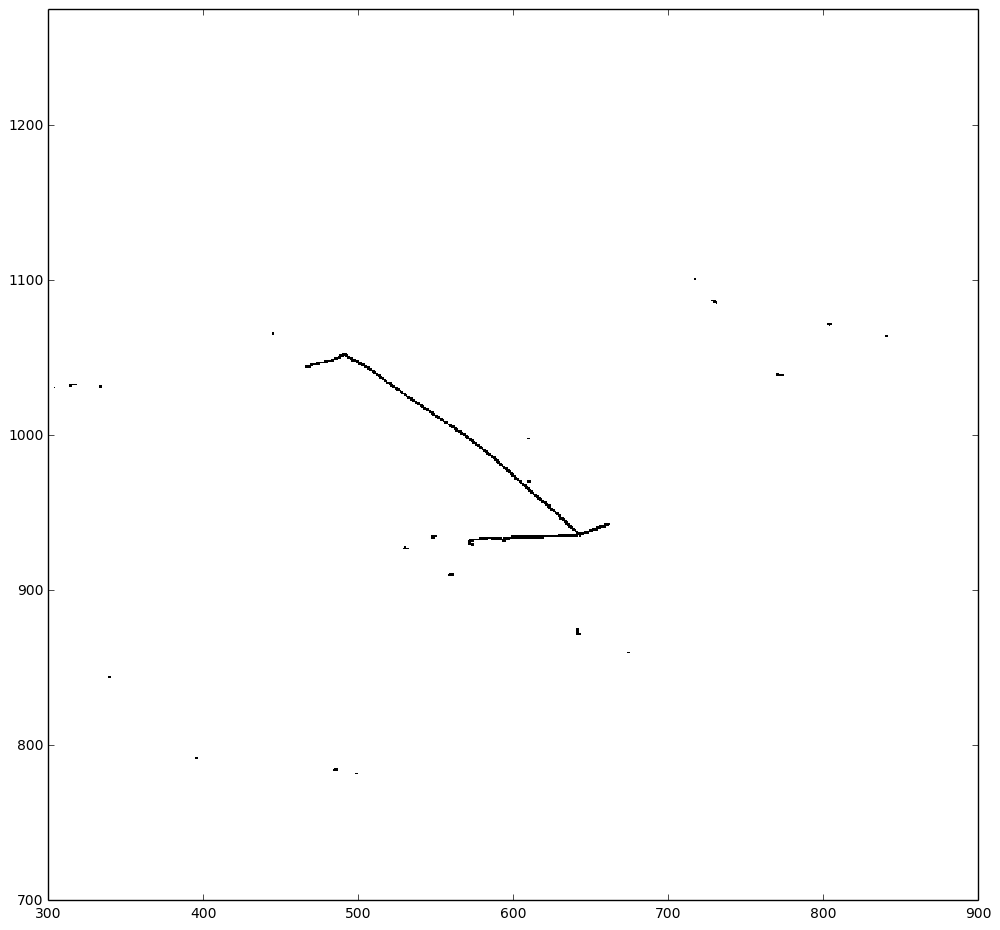

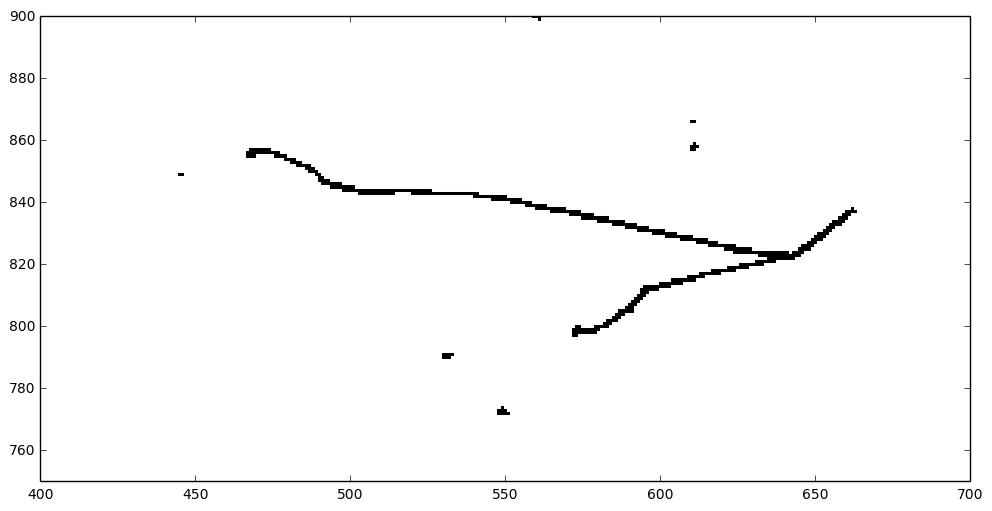

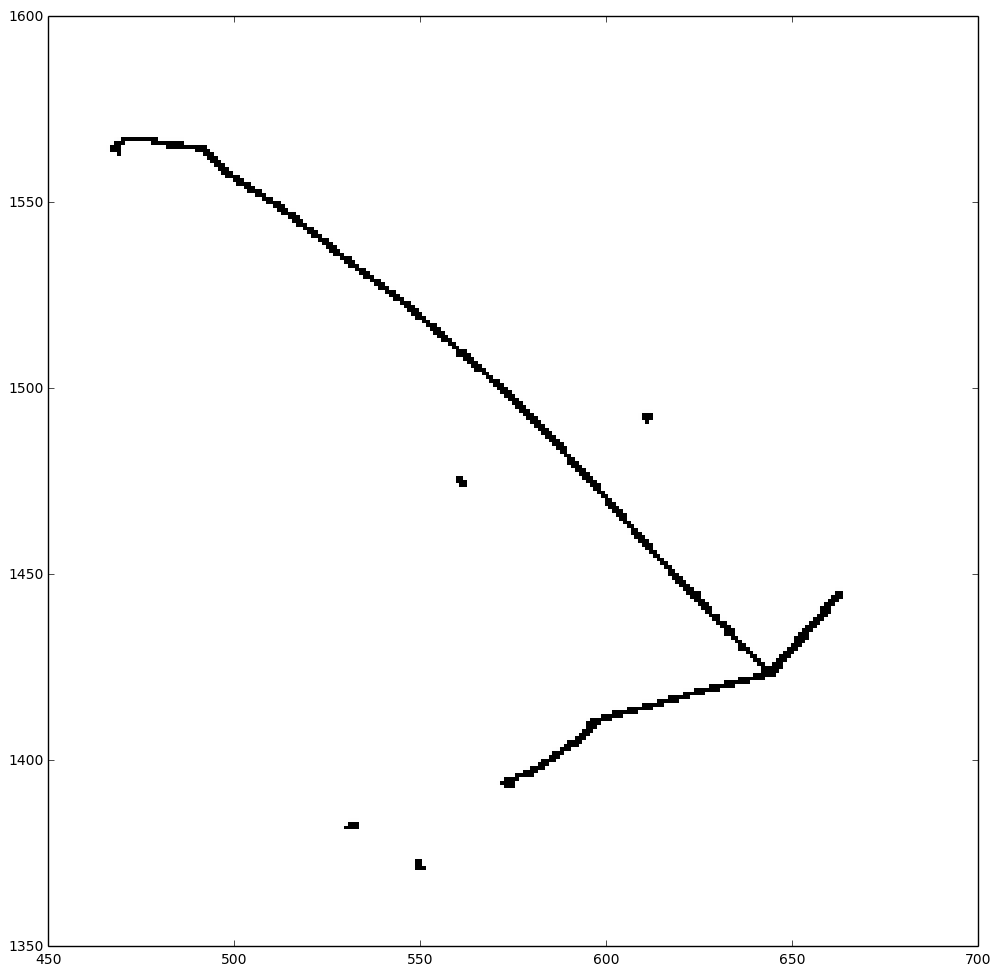

In [5]:
pygeo   = geo2d.PyDraw()

mgr=larbysimg.Manager()
img_v = []

xranges=((300,900),(400,700),(450,700))
yranges=((700,1275),(750,900),(1350,1600))

plane=0
for mat in mgr.InputImages():
    #img_v.append(pygeo.image(mat).transpose())
    img_v.append(pygeo.image(mat))
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    fig,ax=plt.subplots(figsize=(12,12))
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    ax.set_ylim(yranges[plane][0],yranges[plane][1])
    ax.set_xlim(xranges[plane][0],xranges[plane][1])
    plt.show()
    plane+=1

dm=mgr.DataManager()

Plane 0


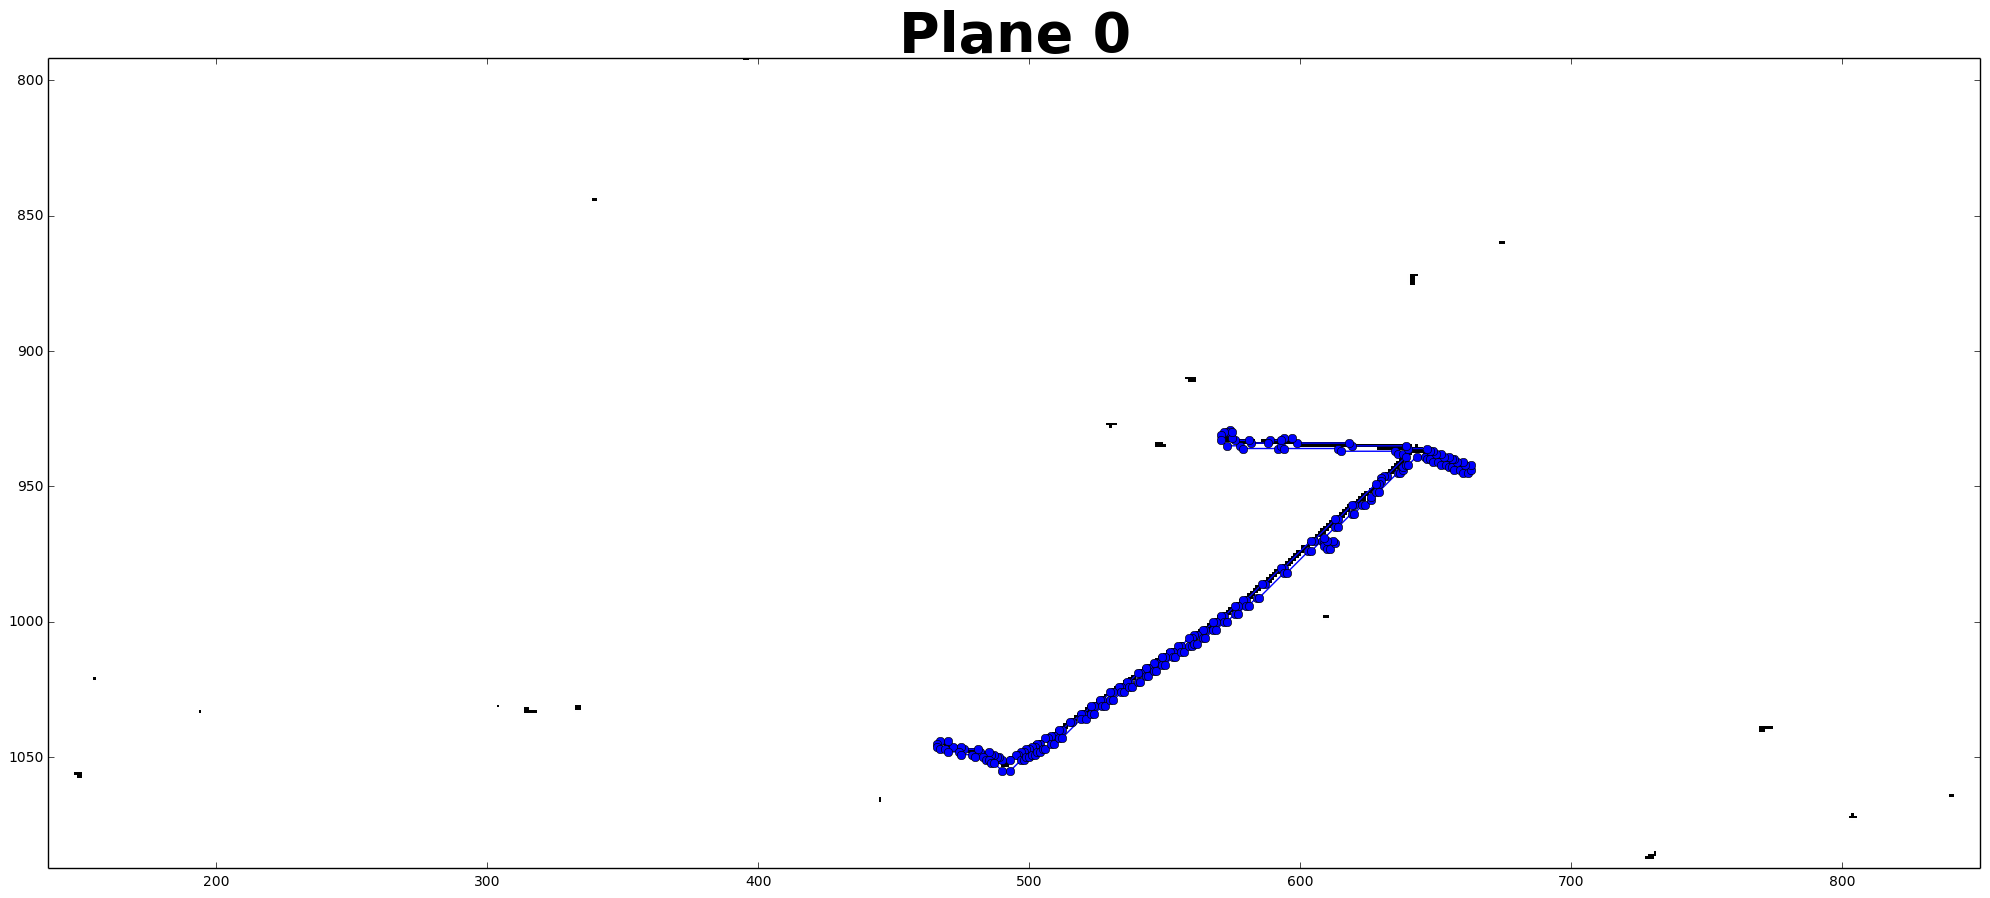

Plane 1


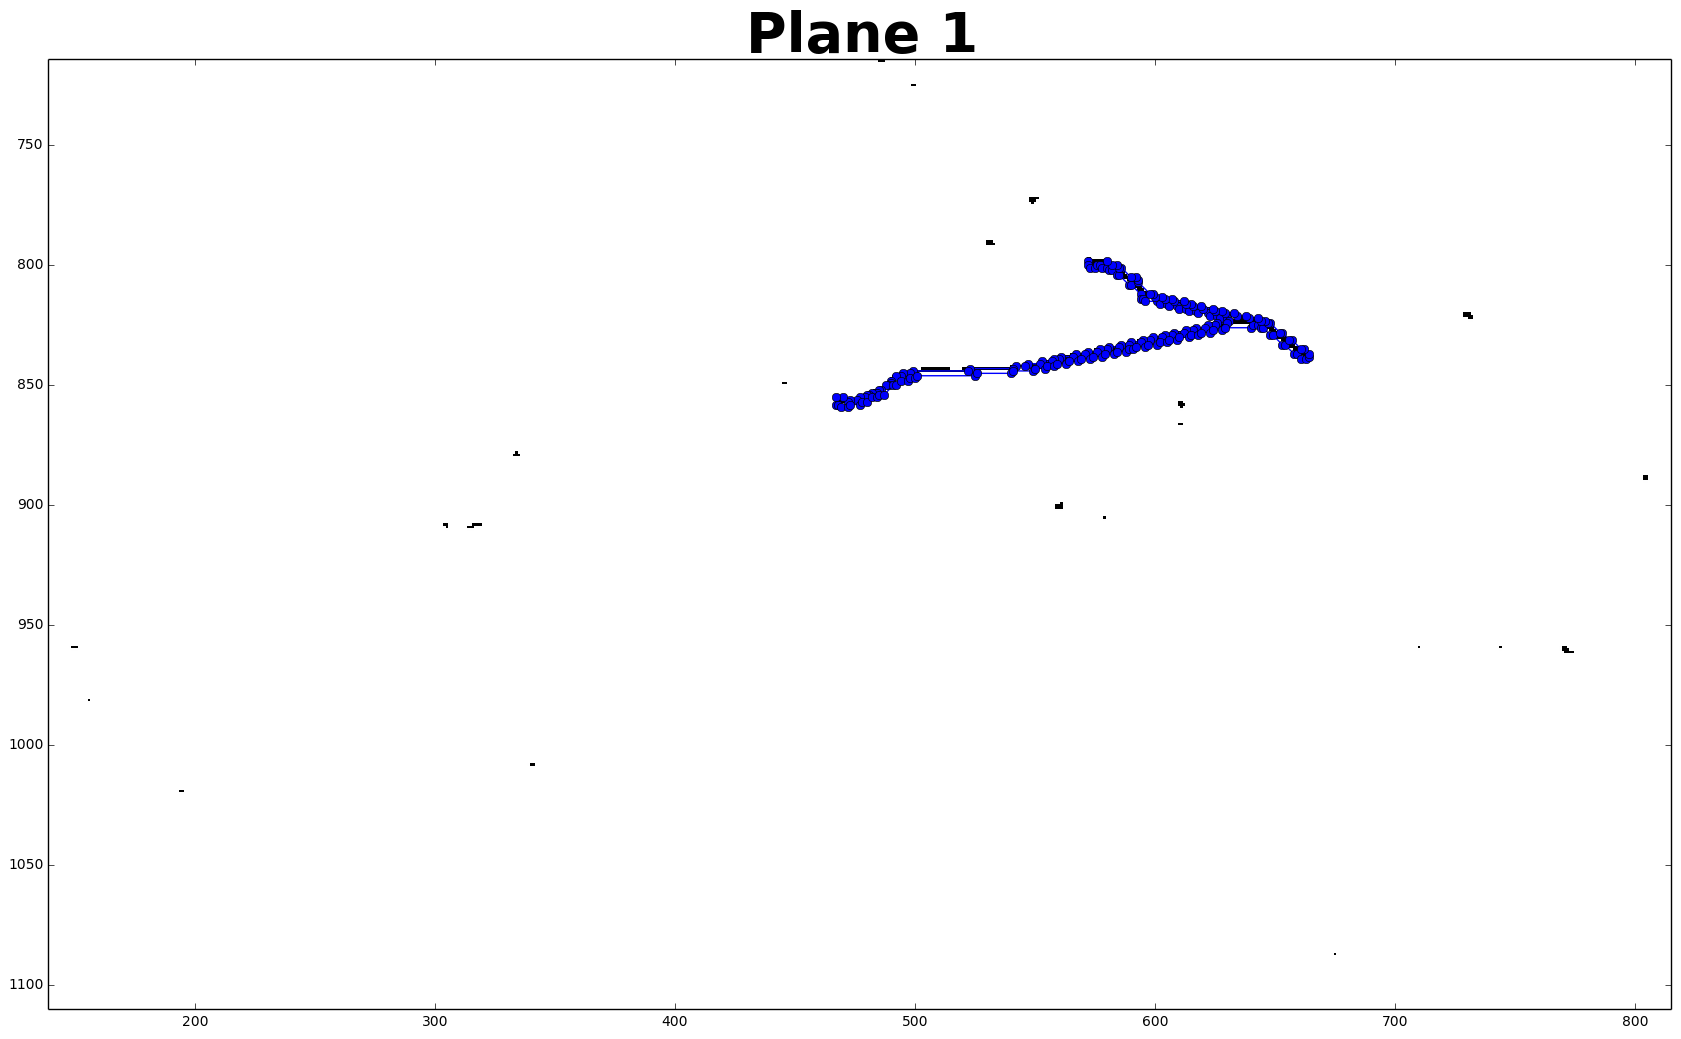

Plane 2


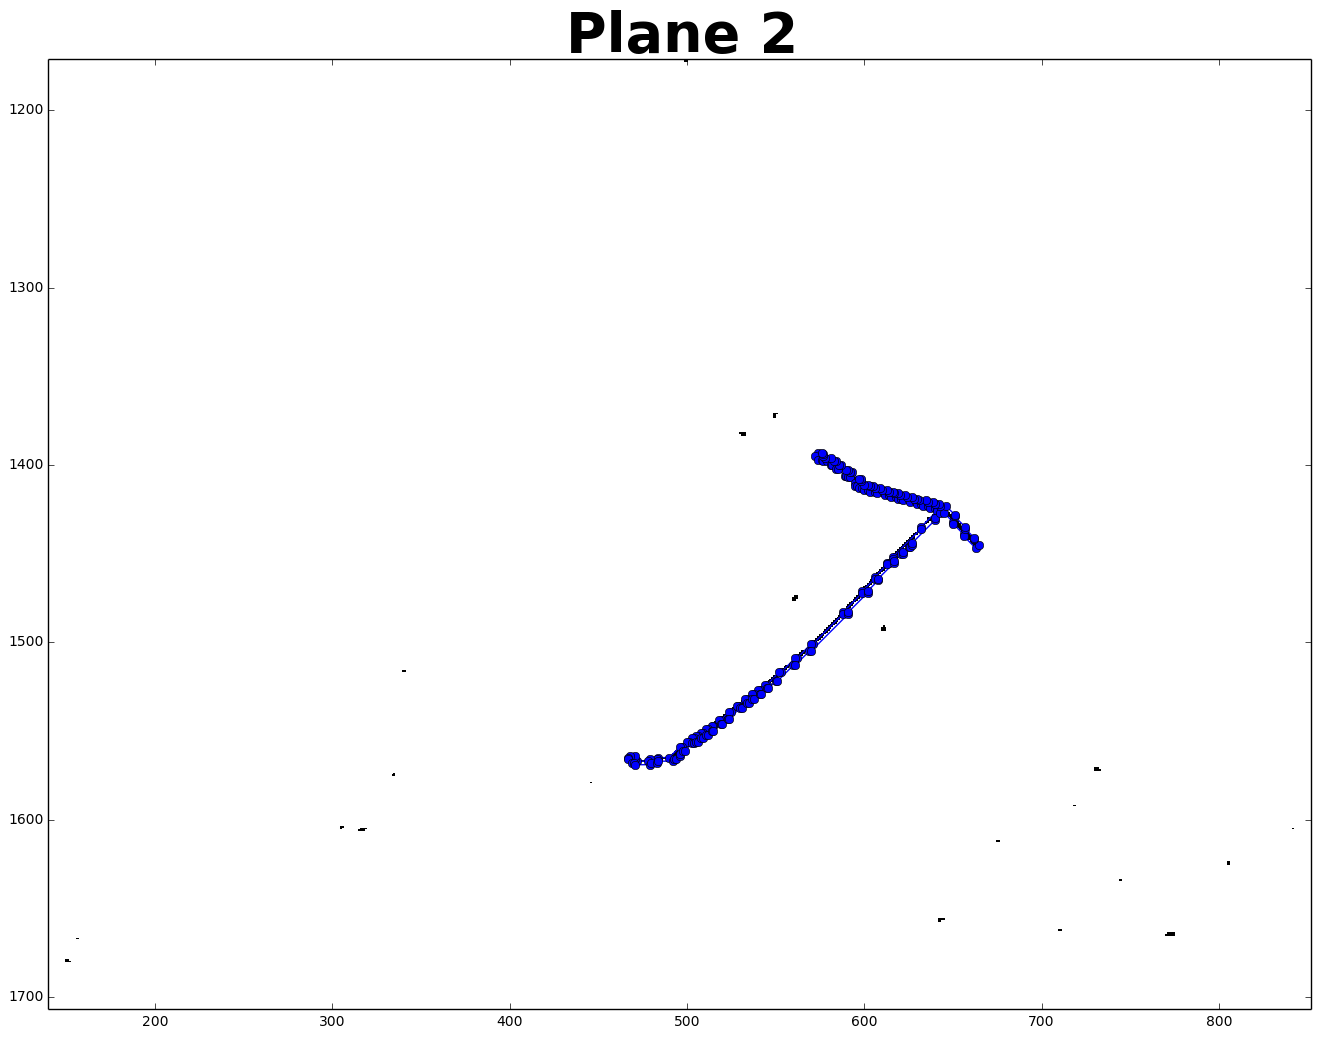

In [6]:
for plane in xrange(3):
    print 'Plane',plane
    fig,ax=plt.subplots(figsize=(20,10))

    #Get the image
    shape_img = img_v[plane]
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.max(nz_pixels[0])-10,np.min(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(900,1100)
    #ax.set_xlim(400,700)

    data=dm.Data(0)

    all_p0=mgr.Clusters(plane,0)

    for ctor in all_p0:
        pts=np.array([[pt.x,pt.y] for pt in ctor._contour])
        plt.plot(pts[:,0],pts[:,1],'-o')

    ax.set_aspect(1.0)
    plt.tight_layout()
    ax.set_title("Plane {}".format(plane),fontweight='bold',fontsize=40)
    plt.show()

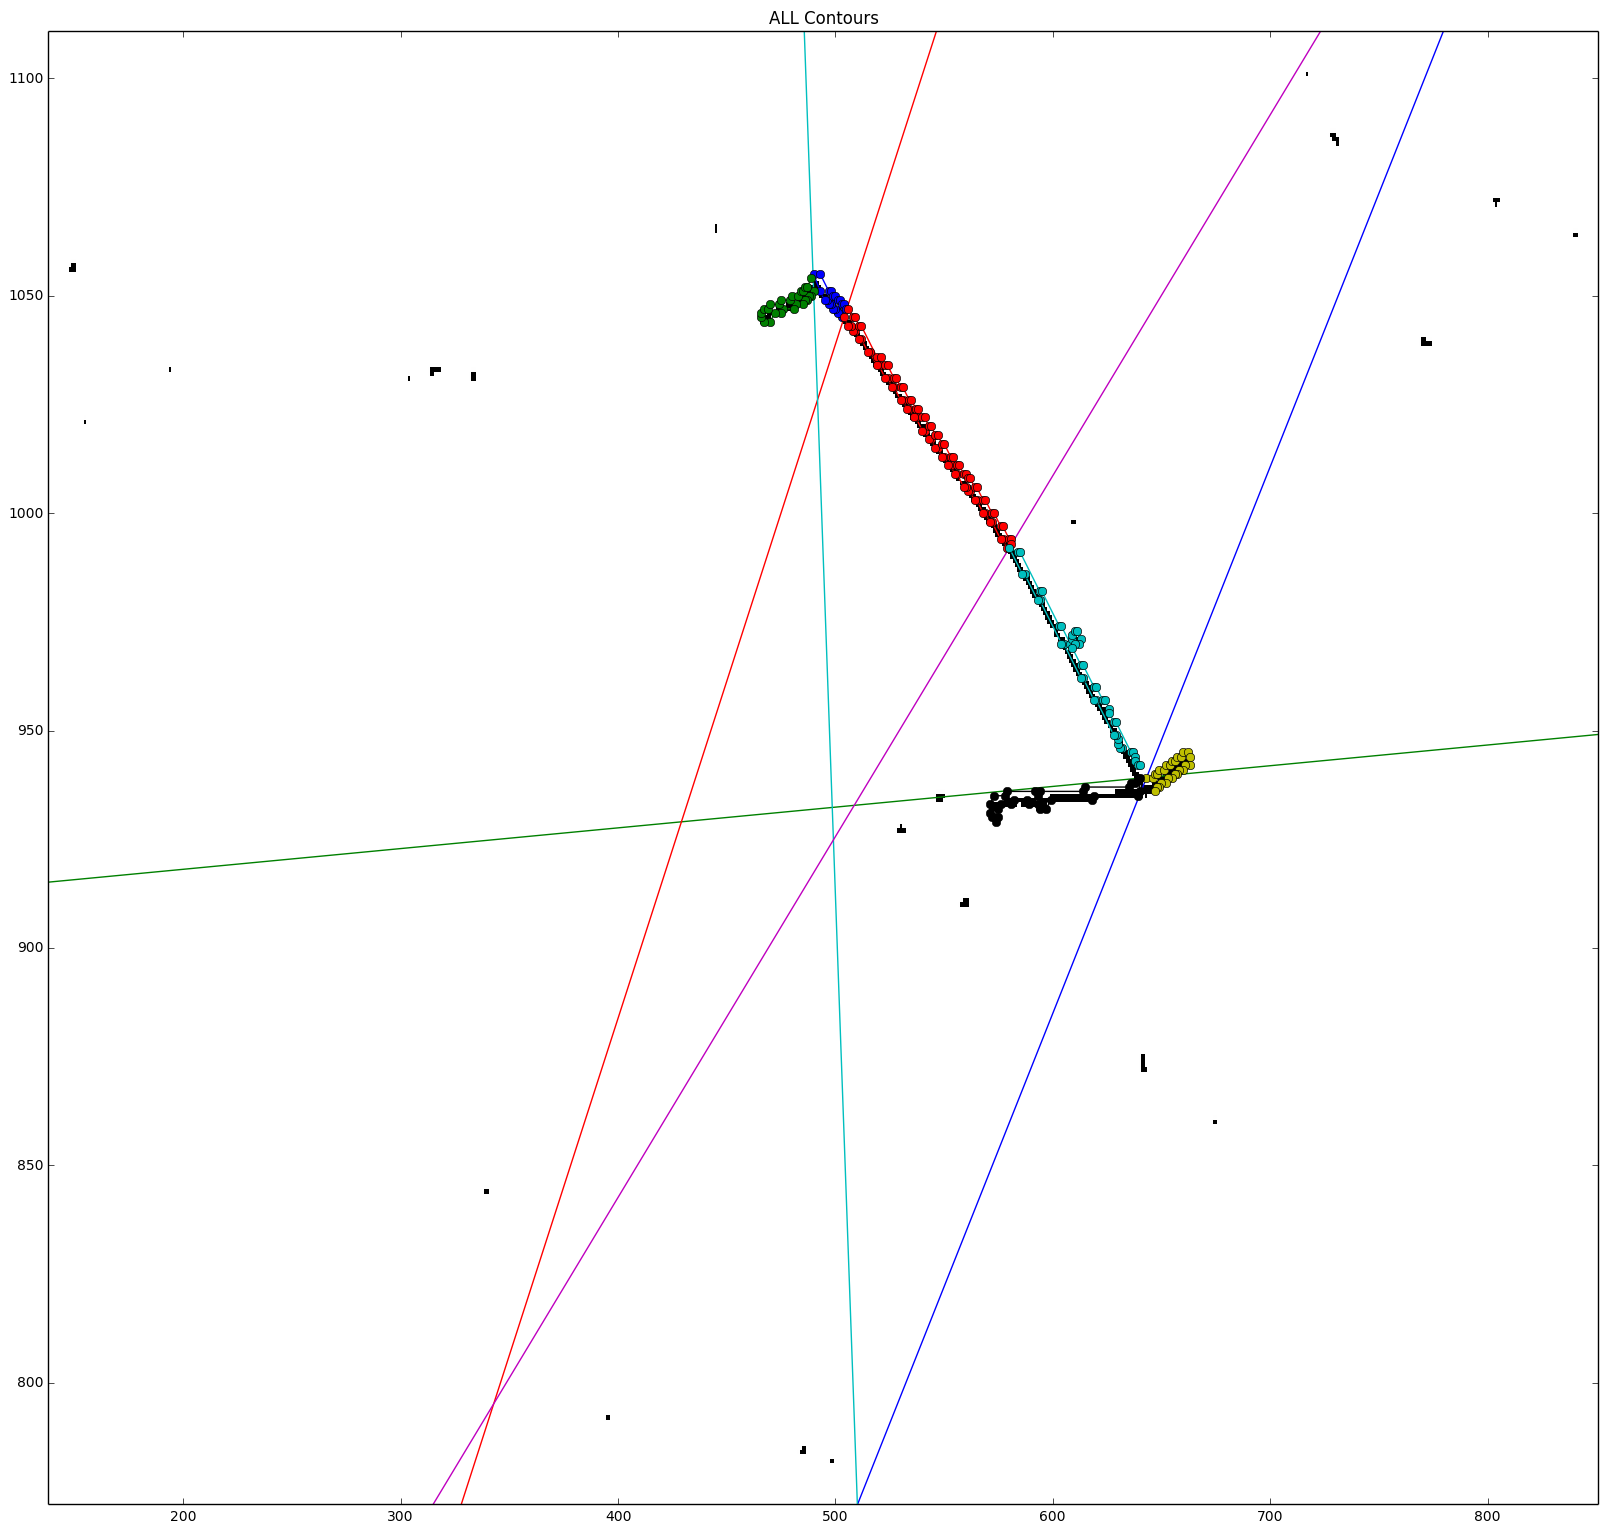

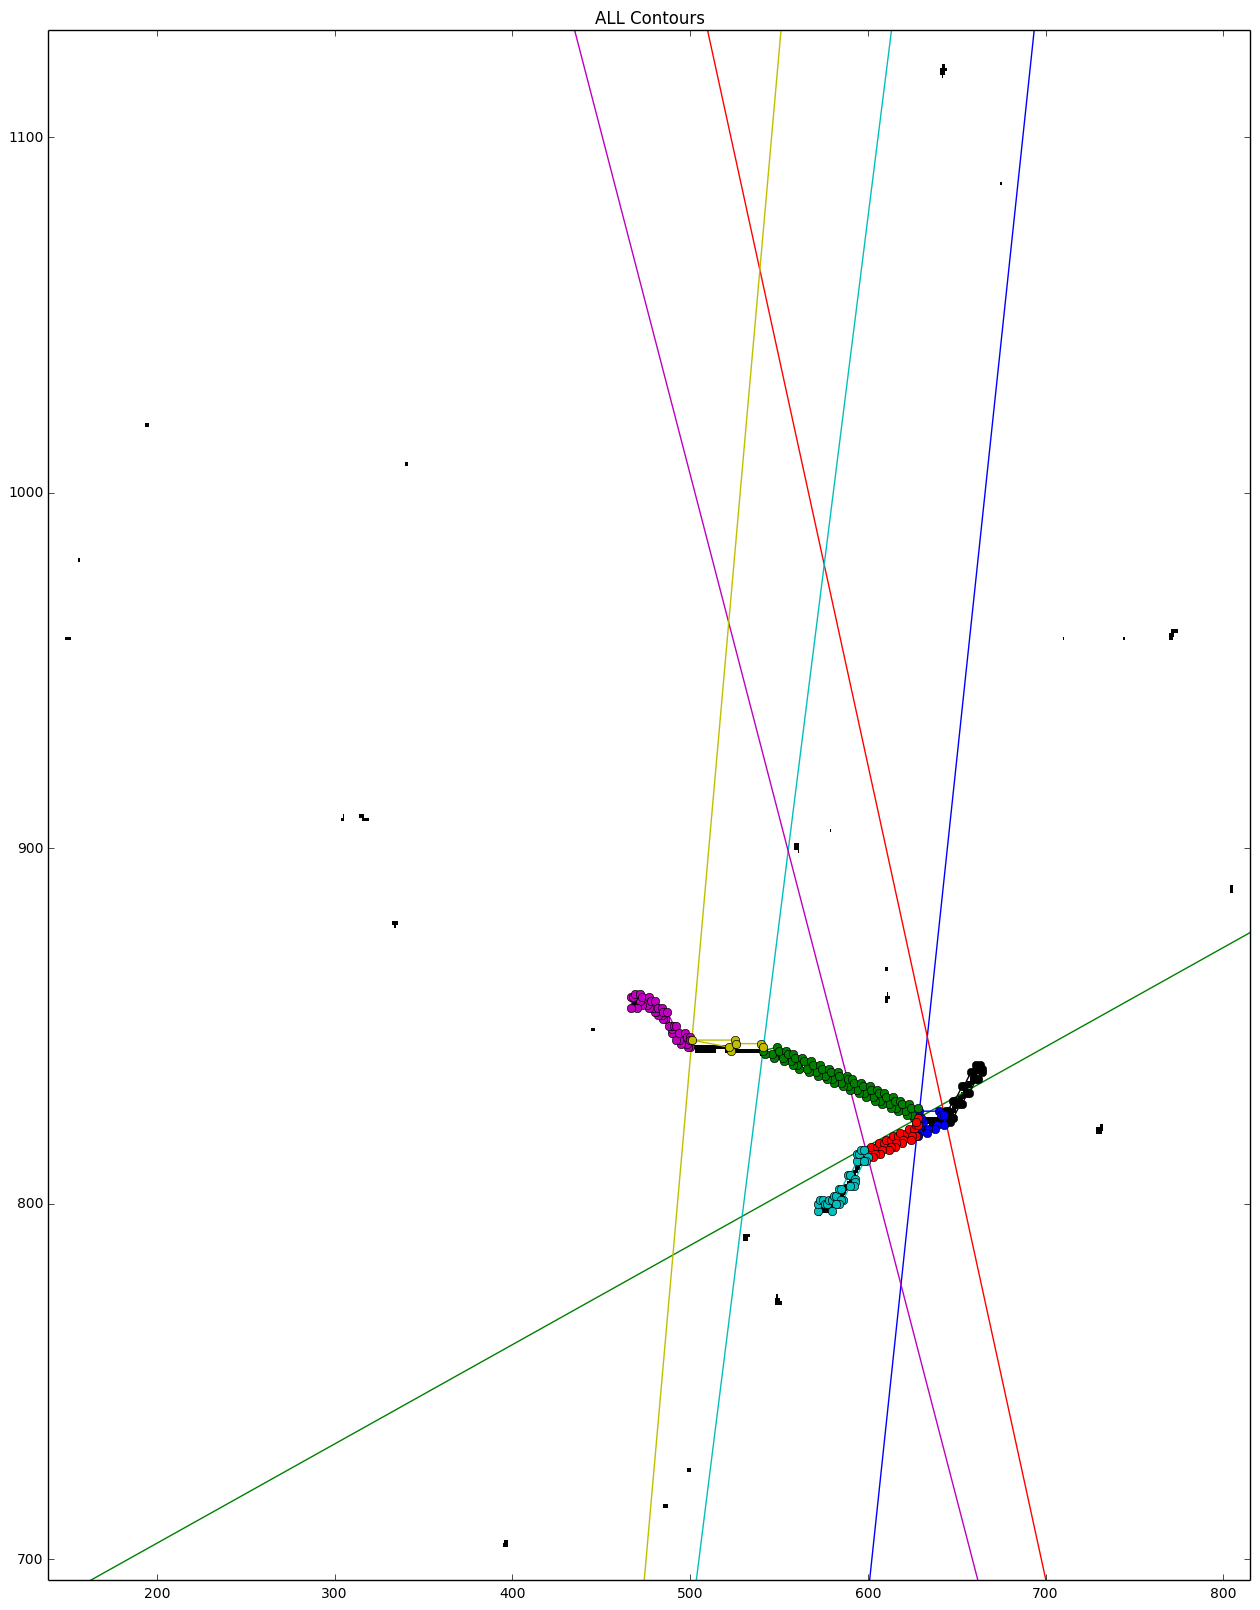

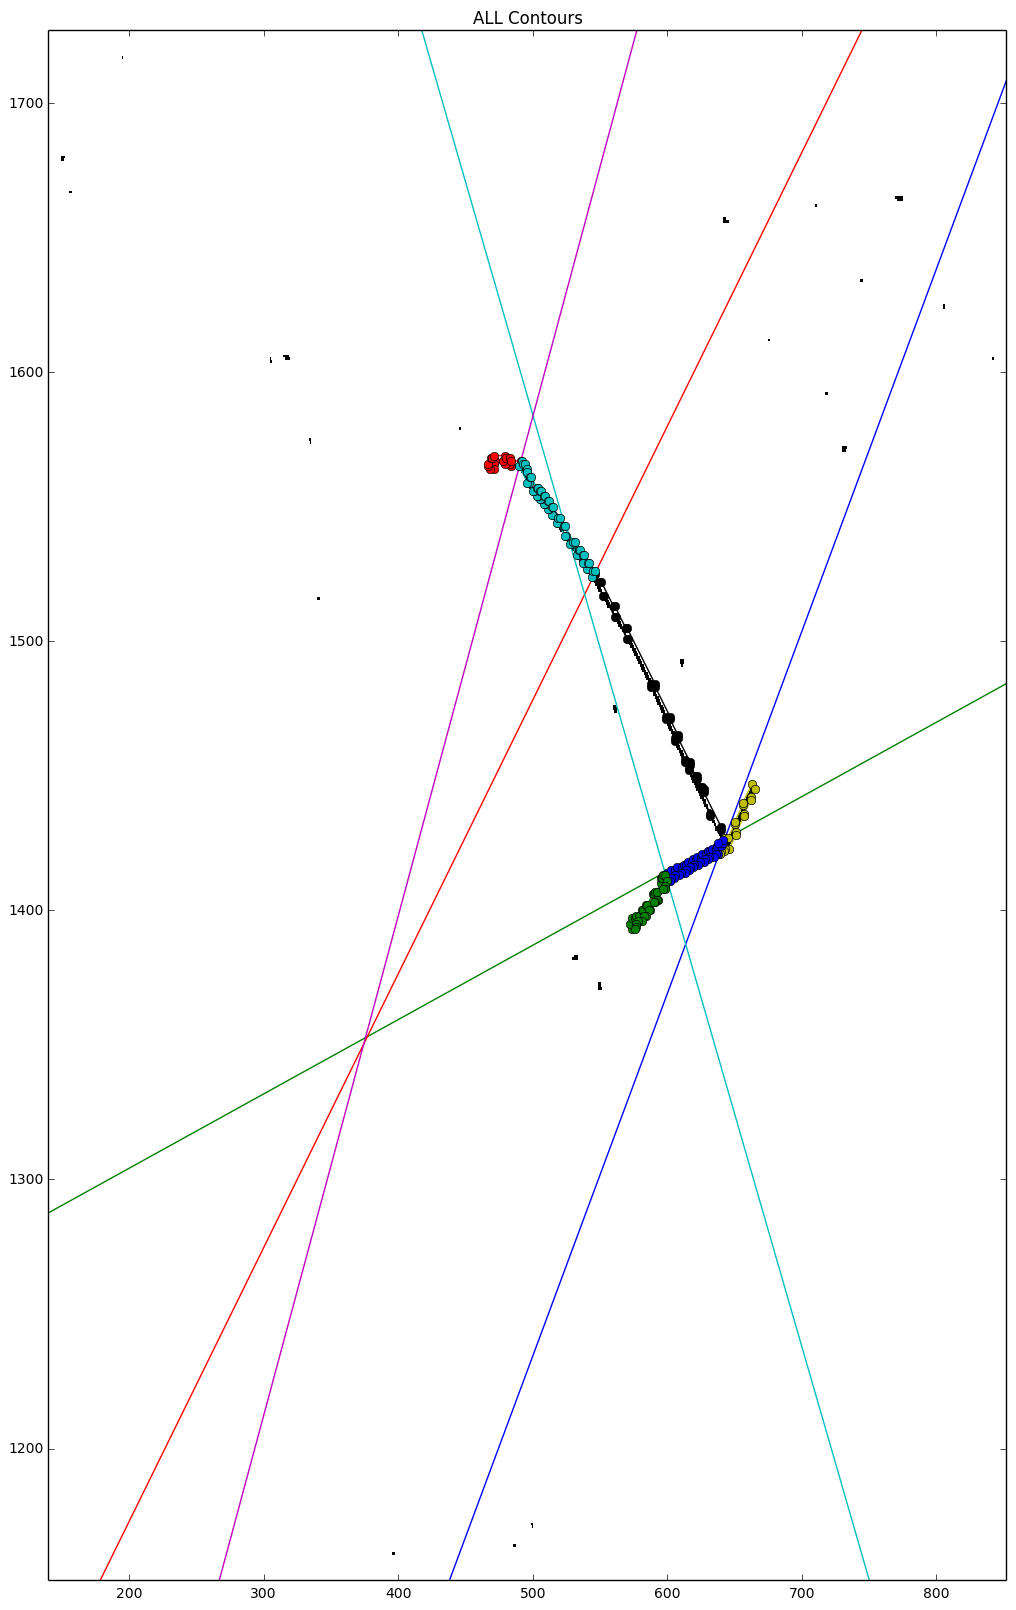

In [7]:
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(20,20))

    #Get the image
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(650,700)
    #ax.set_xlim(275,325)

    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    data=dm.Data(1)

    split_lines=data._split_line_v_v[plane]

    for sline in split_lines:
        ax.plot([0,900],[sline.y(0),sline.y(900)])

    atomic_p0=data._atomic_ctor_v_v[plane]

    for atomic in atomic_p0:
        pts=np.array([[pt.x,pt.y] for pt in atomic])
        plt.plot(pts[:,0],pts[:,1],'-o')

    ax.set_aspect(2.0)
    ax.set_title("ALL Contours")
    plt.show()

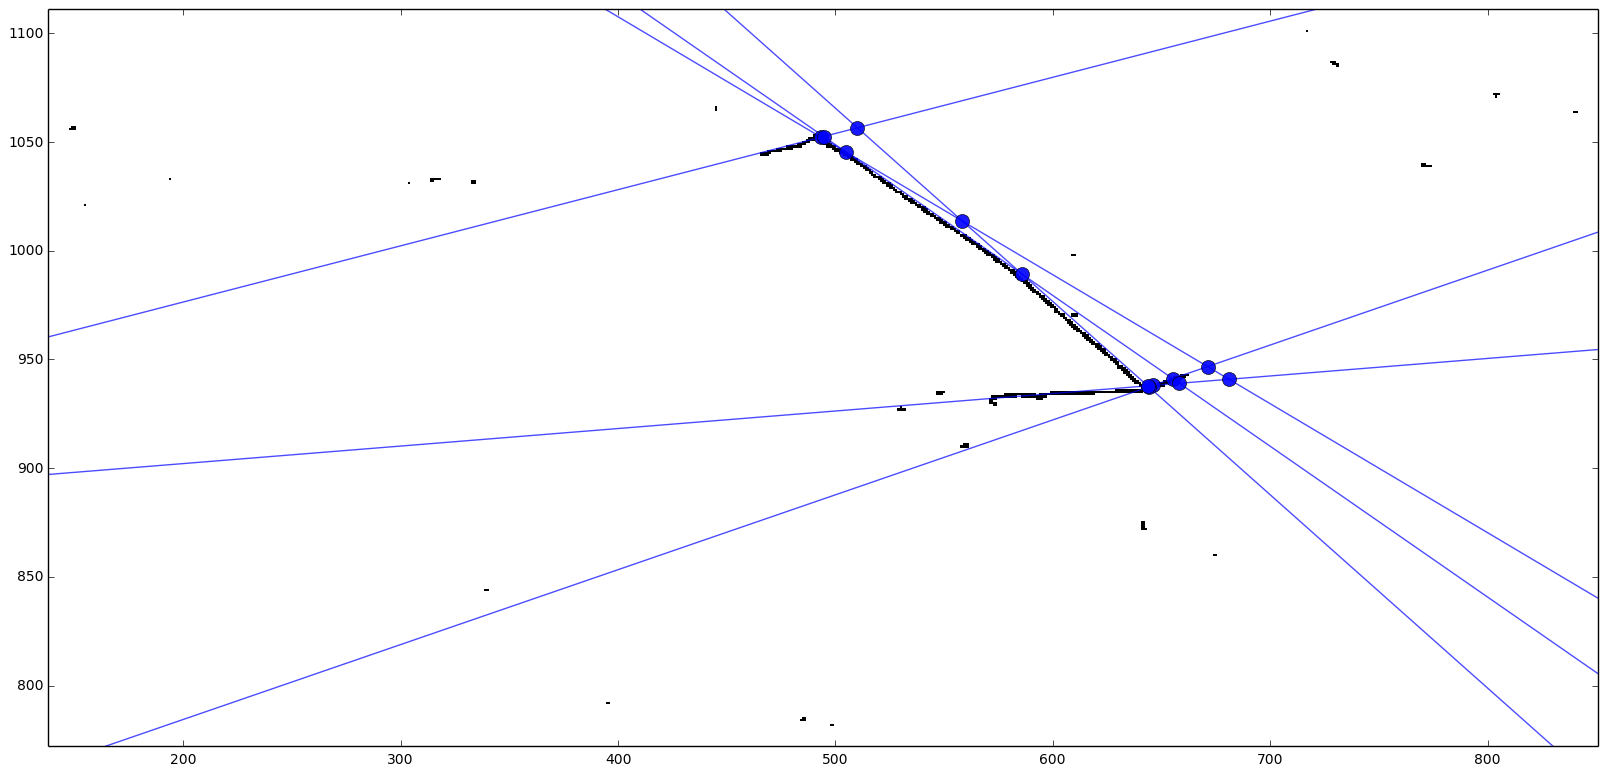

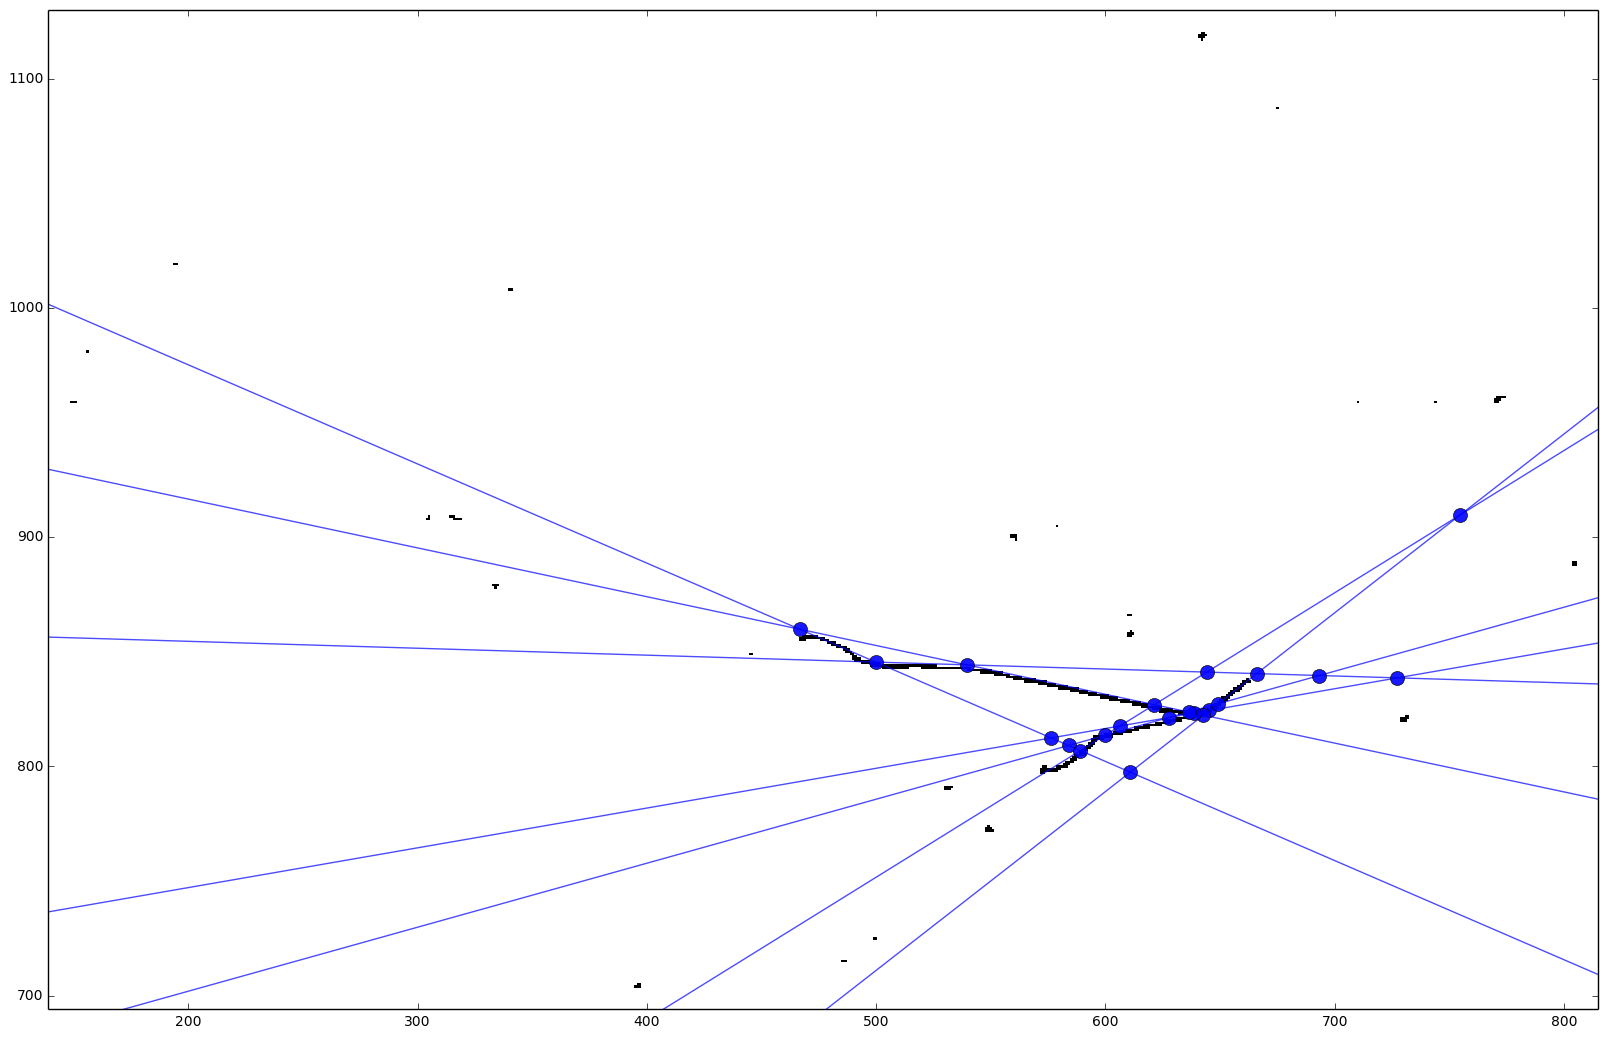

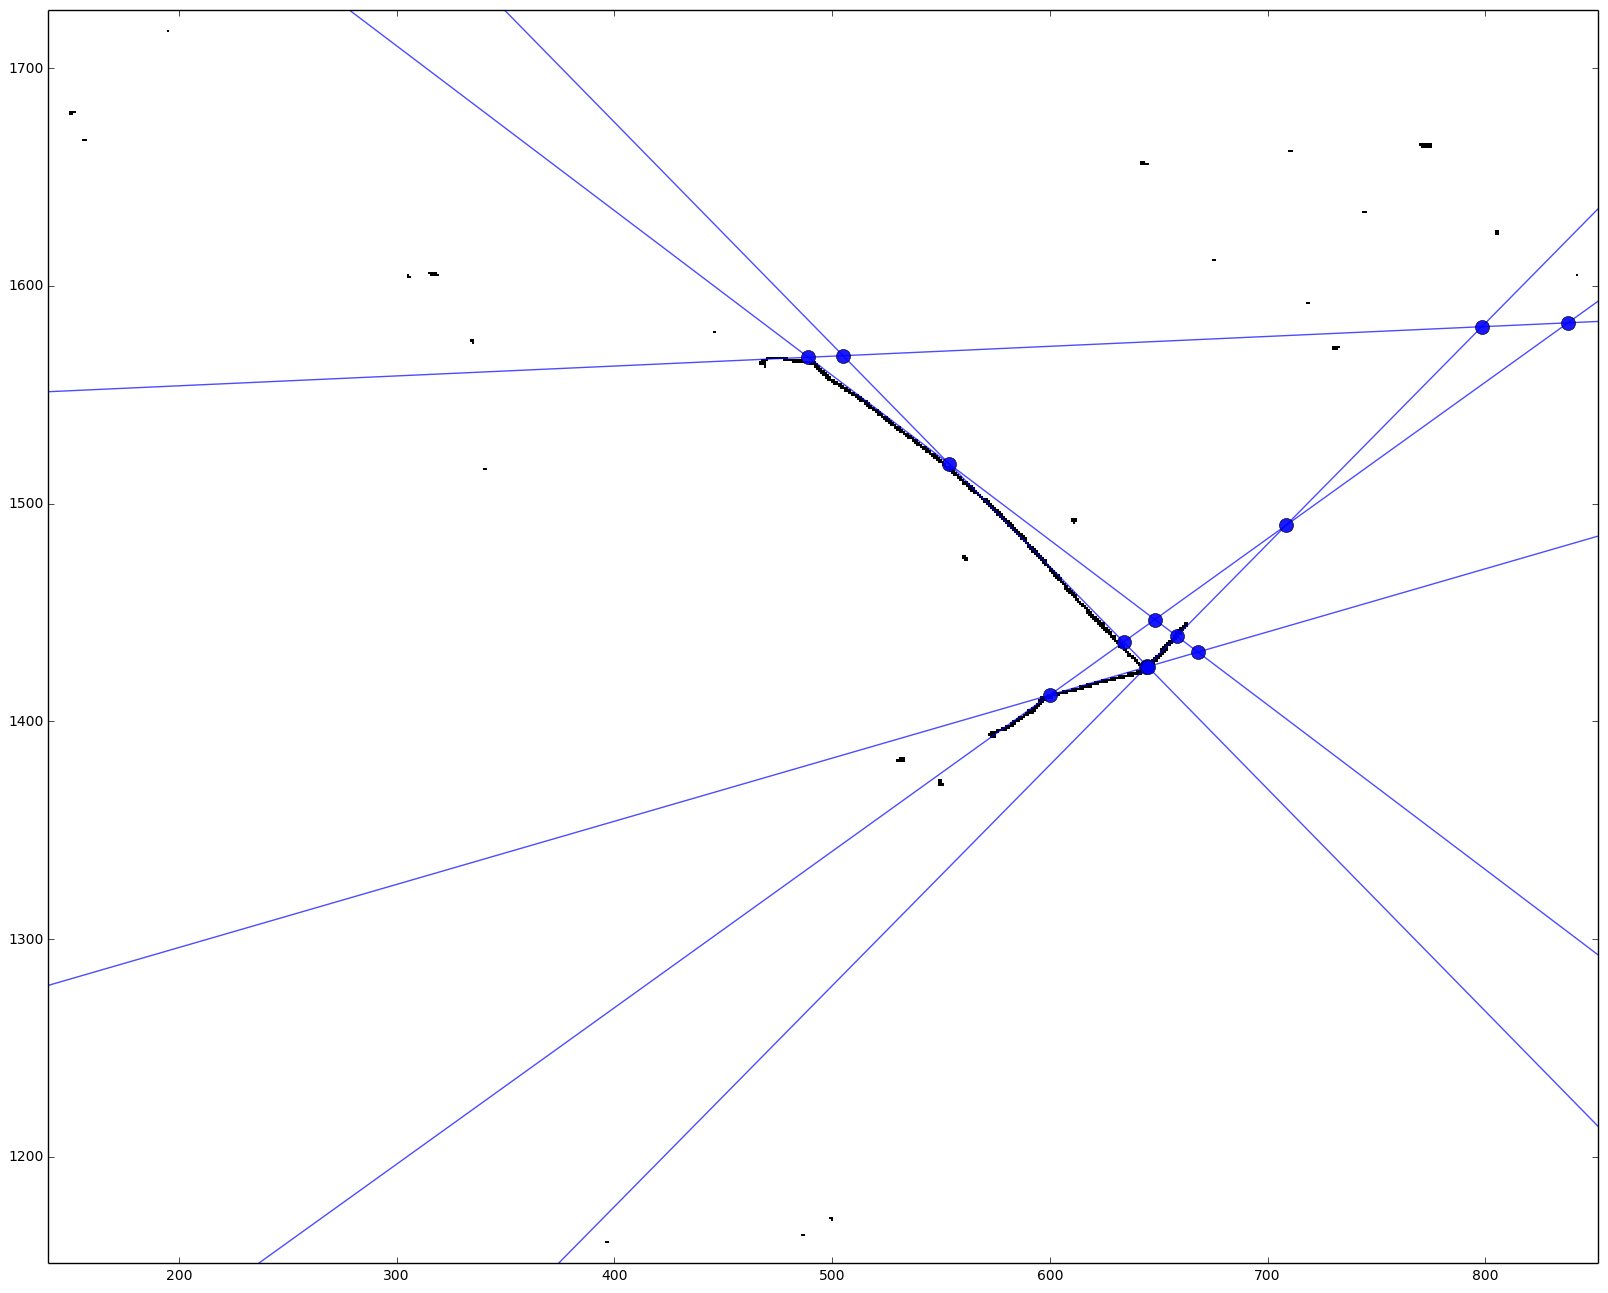

In [8]:
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(20,20))
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)

    cv=larbysimg.Manager().GetClusterAlg(2)
    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    cv_data=dm.Data(2)

    cv_ctor_lines_v=cv_data._ctor_lines_v_v_v[plane]
    cv_inter_pts_v=cv_data._ipoints_v_v[plane]

    ix=-1

    for cv_ctor_lines in cv_ctor_lines_v:
    
        ix+=1
        color=colormap[ix]
        
        for line in cv_ctor_lines:
            plt.plot([0,900],[line.y(0),line.y(900)],alpha=0.7,color=color)

    inter_pts=np.array([[inter_pt.x,inter_pt.y] for inter_pt in cv_inter_pts_v])
    plt.plot(inter_pts[:,0],inter_pts[:,1],'o',markersize=10,color=color,alpha=0.9)   
            
    ax=plt.gca()
    plt.show()

632.230773926 945.511901855
631.170776367 935.496337891
45


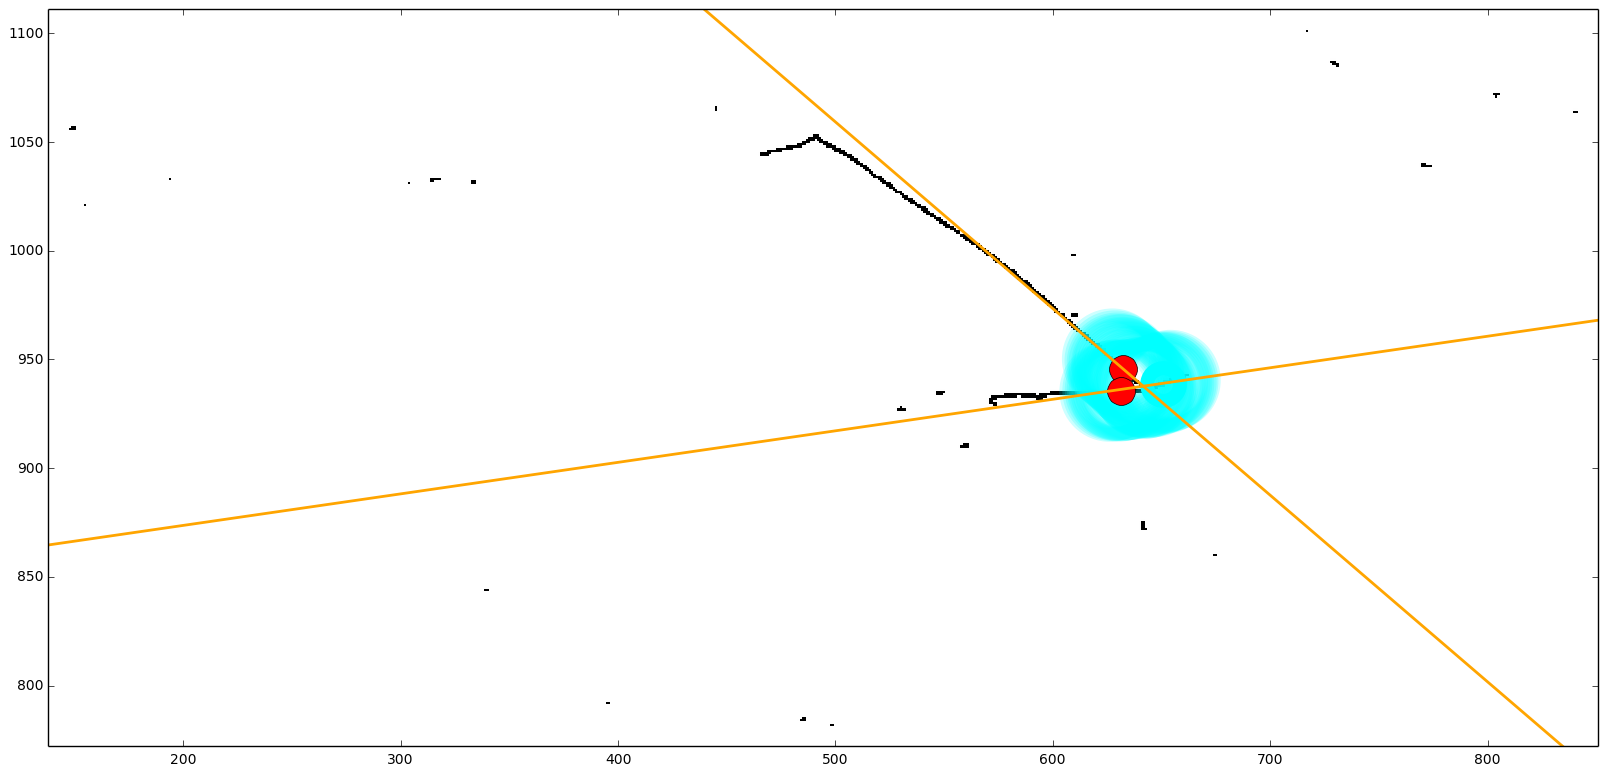

660.844909668 836.47467041
622.425415039 825.503417969
626.008117676 819.09777832
59


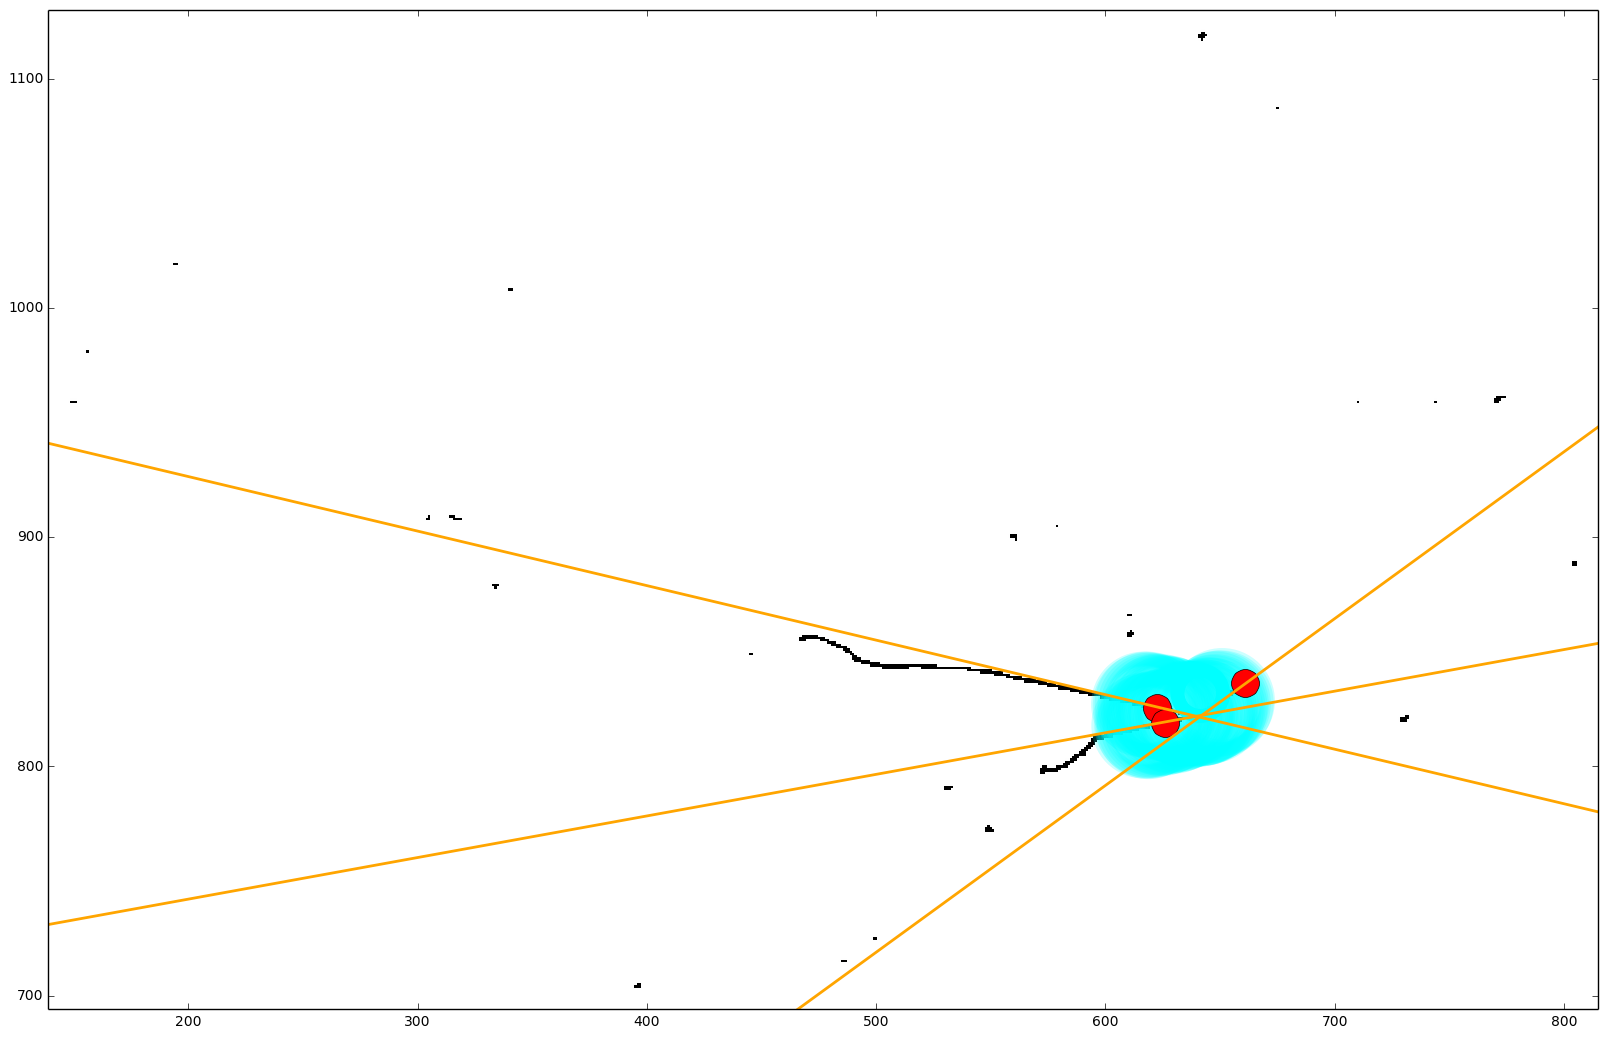

658.503845215 1439.46813965
629.731018066 1438.36901855
625.755981445 1418.47973633
77


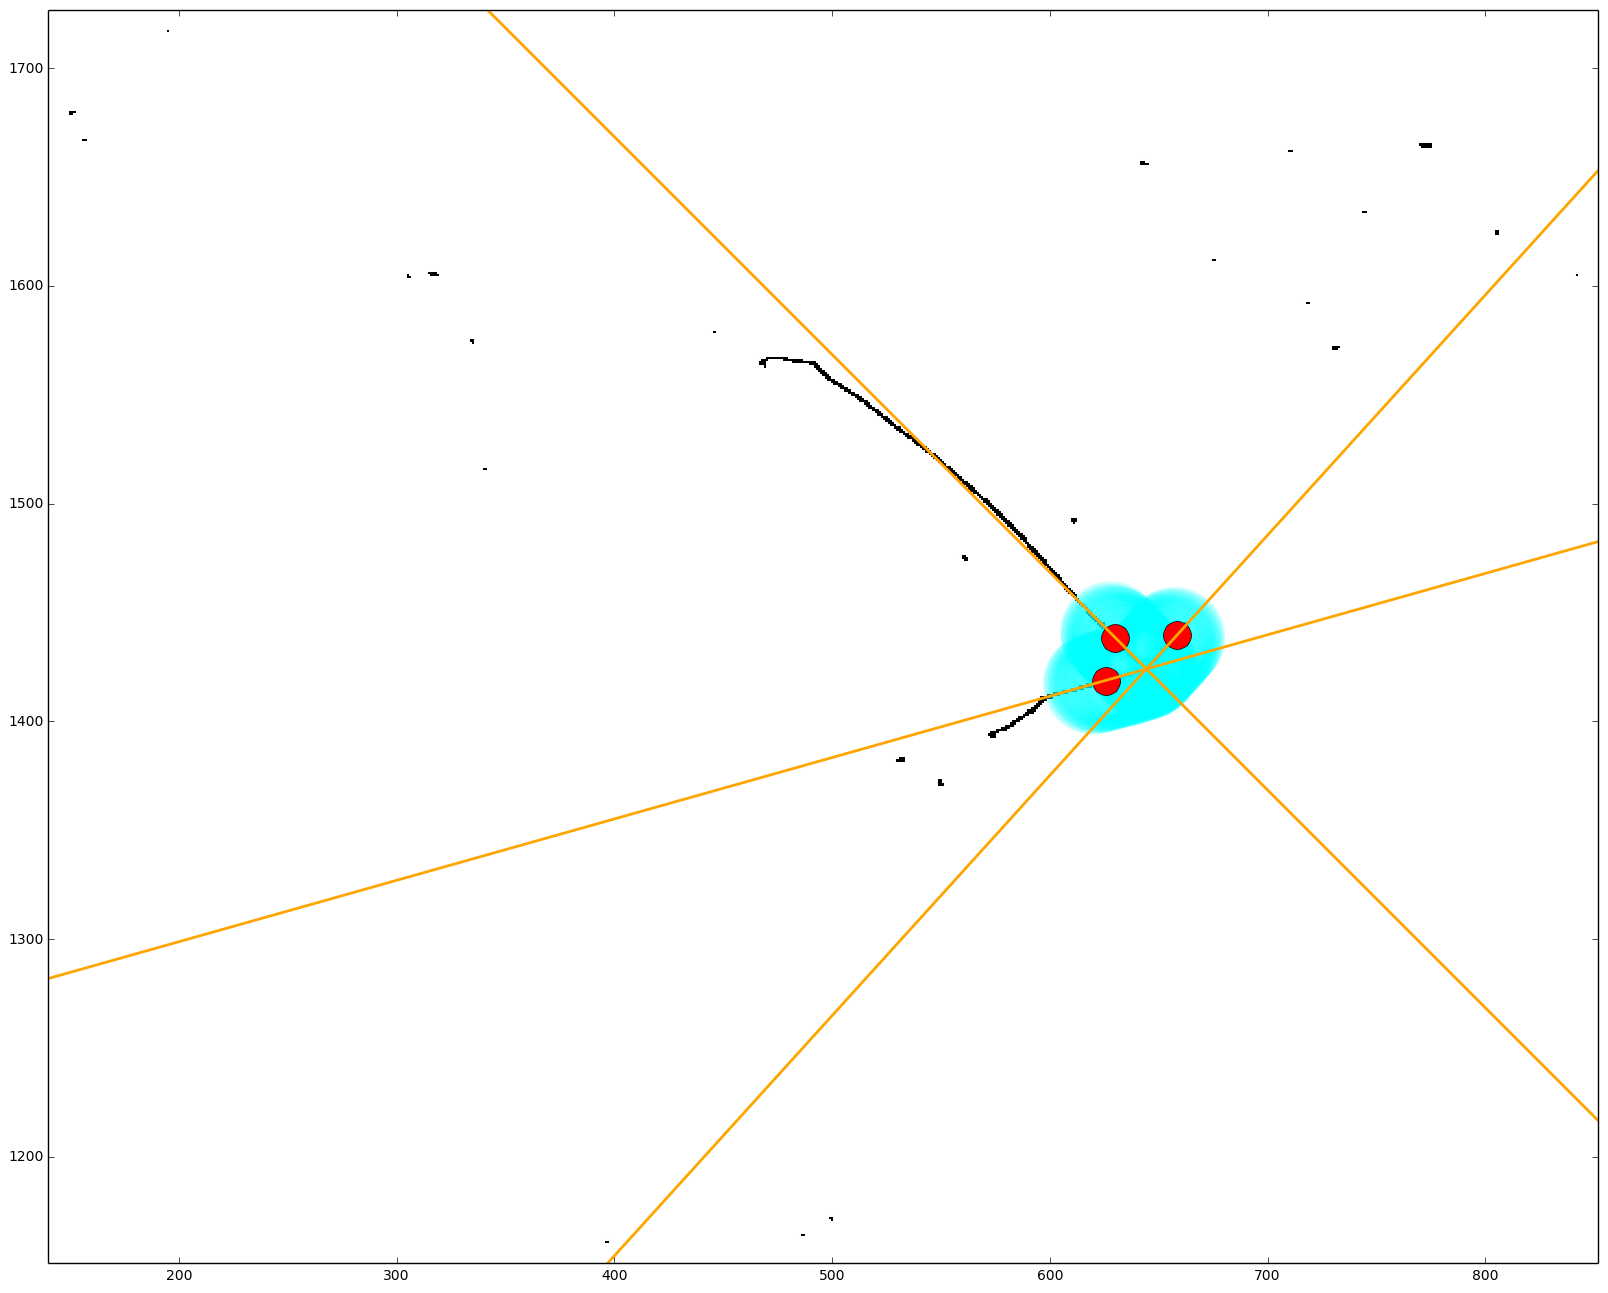

In [9]:
import matplotlib.patches as patches
#xranges=((600,700),(575,675),(575,700))
#yranges=((900,1000),(775,875),(1375,1475))
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(20,20))
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    #ax.set_ylim(np.min(nz_pixels[0])+50,np.max(nz_pixels[0])-40)
    #ax.set_xlim(np.min(nz_pixels[1])+250,np.max(nz_pixels[1])-90)
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(875,975)
    #ax.set_xlim(600,700)
    #ax.set_ylim(yranges[plane][0],yranges[plane][1])
    #ax.set_xlim(xranges[plane][0],xranges[plane][1])
    ix=-1

    #for cv_ctor_lines in cv_ctor_lines_v:
    #
    #    ix+=1
    #    color=colormap[ix]
    #    for line in cv_ctor_lines:
    #        pass#plt.plot([0,900],[line.y(0),line.y(900)],alpha=0.7,color=color)
    #    
    #for inter_pt in cv_inter_pts_v[plane]:
    #    pass#plt.plot(inter_pt.x,inter_pt.y,'o',markersize=10,color=color,alpha=0.9)   
        

    cv=larbysimg.Manager().GetClusterAlg(3)
    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    cv_data=dm.Data(3)
    circle_v = cv_data._circledata_v_v[plane]
    for circle in circle_v:
        c=patches.Circle((circle.center.x,circle.center.y),circle.radius,ec='cyan',fc='none',lw=10)
        ax.add_patch(c)

    ref_data = dm.Data(4)

    for idx in xrange(ref_data._init_xs_vv[plane].size()):
        pt = ref_data._init_xs_vv[plane][idx]
        plt.plot([pt.x],[pt.y],color='r',marker='o',markersize=20)
        print pt.x,pt.y
        #print ref_data._x_vv[0][idx],ref_data._y_vv[0][idx]
    for l in ref_data._init_pca_vv[plane]:
        if l.dir.y == 1:
            plt.plot([0,900],[0,2000],'-',color='orange',linewidth=2)
        else:
            plt.plot([0,900],[l.y(0),l.y(900)],'-',color='orange',linewidth=2)
        #print l.pt.x,l.pt.y,l.dir.x,l.dir.y    

    print ref_data._circle_trav_vv[plane].size()
    for circle in ref_data._circle_trav_vv[plane]:
        c=patches.Circle((circle.center.x,circle.center.y),circle.radius,ec='cyan',alpha=0.2,fc='none',lw=10)
        ax.add_patch(c)

    ax=plt.gca()
    ax.set_aspect(1.0)
    plt.savefig
    plt.show()

plane 0
641.315185547 937.305114746 2.01618671417
plane 1
643.184020996 823.552246094 2.408857584
plane 2
643.360778809 1423.6159668 1.49364447594


/Library/Python/2.7/site-packages/ipykernel/__main__.py:40: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


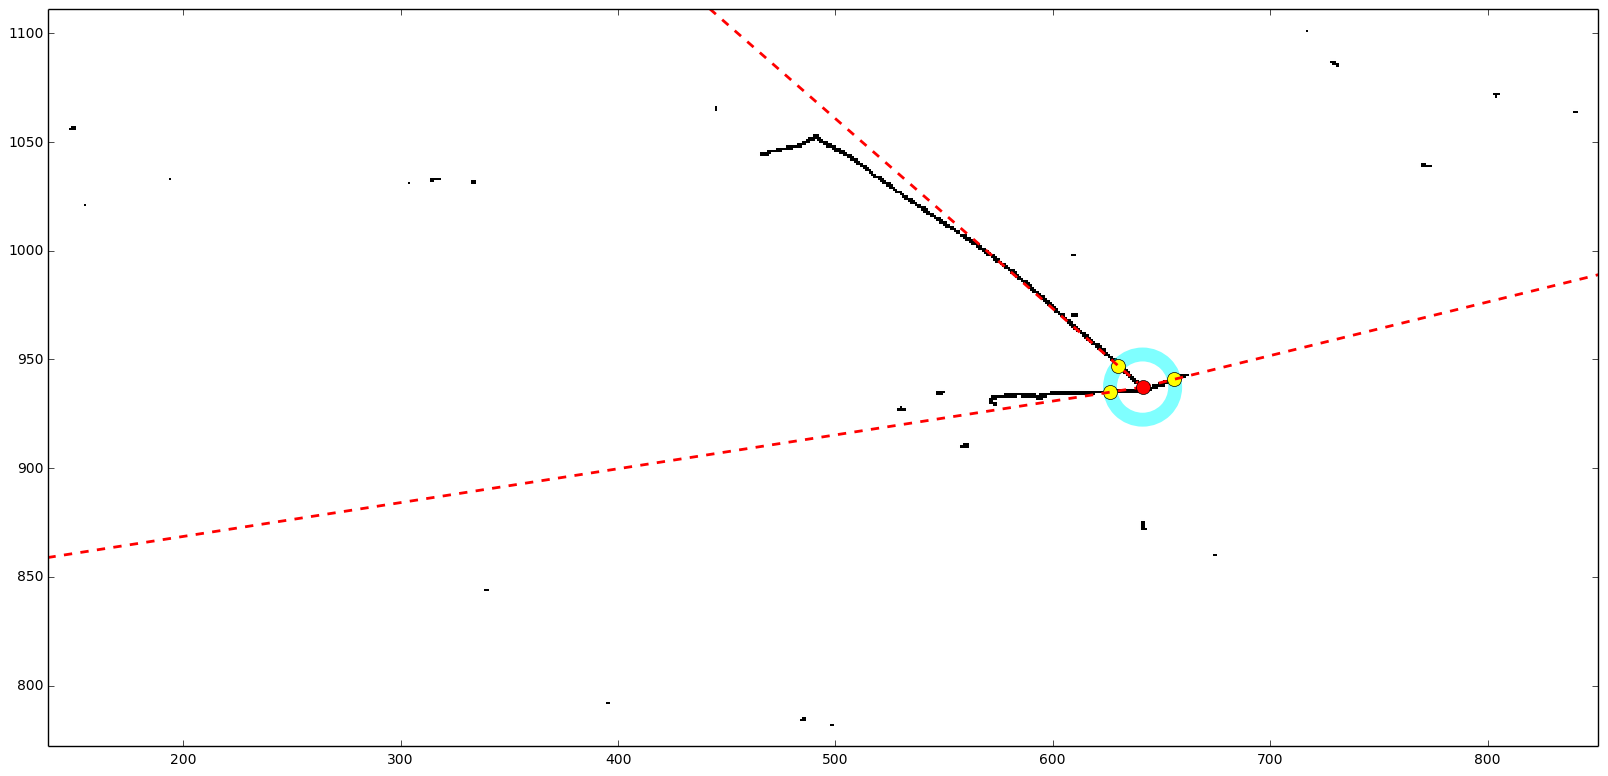

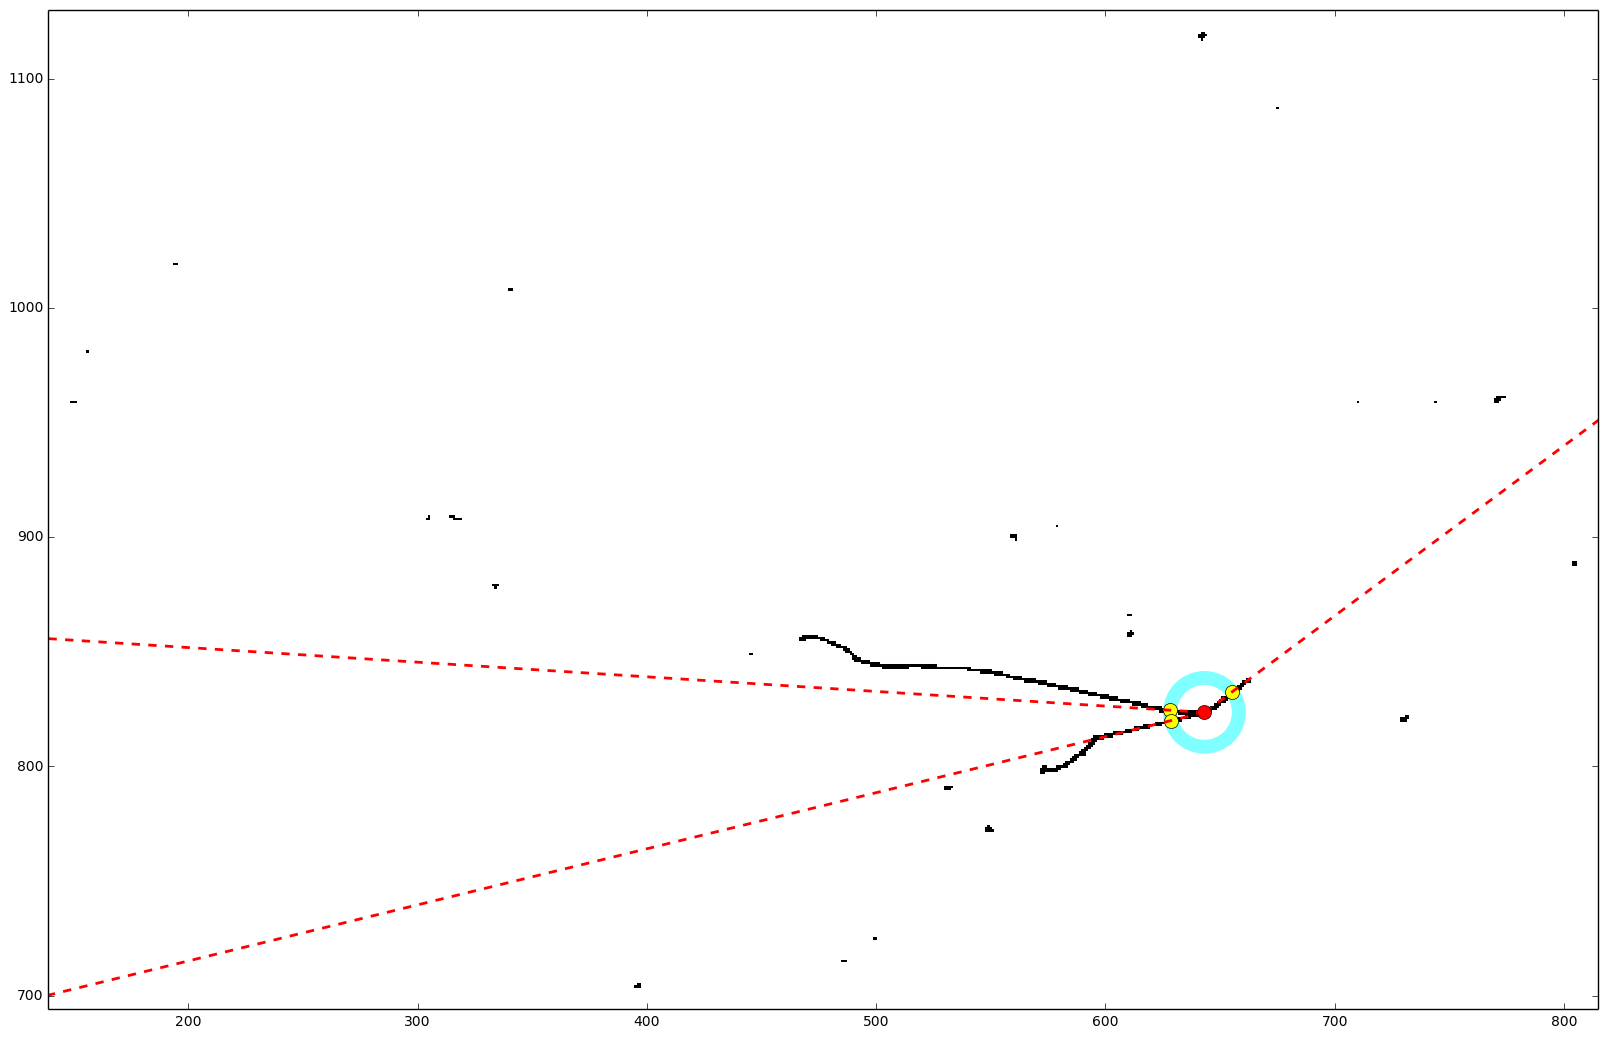

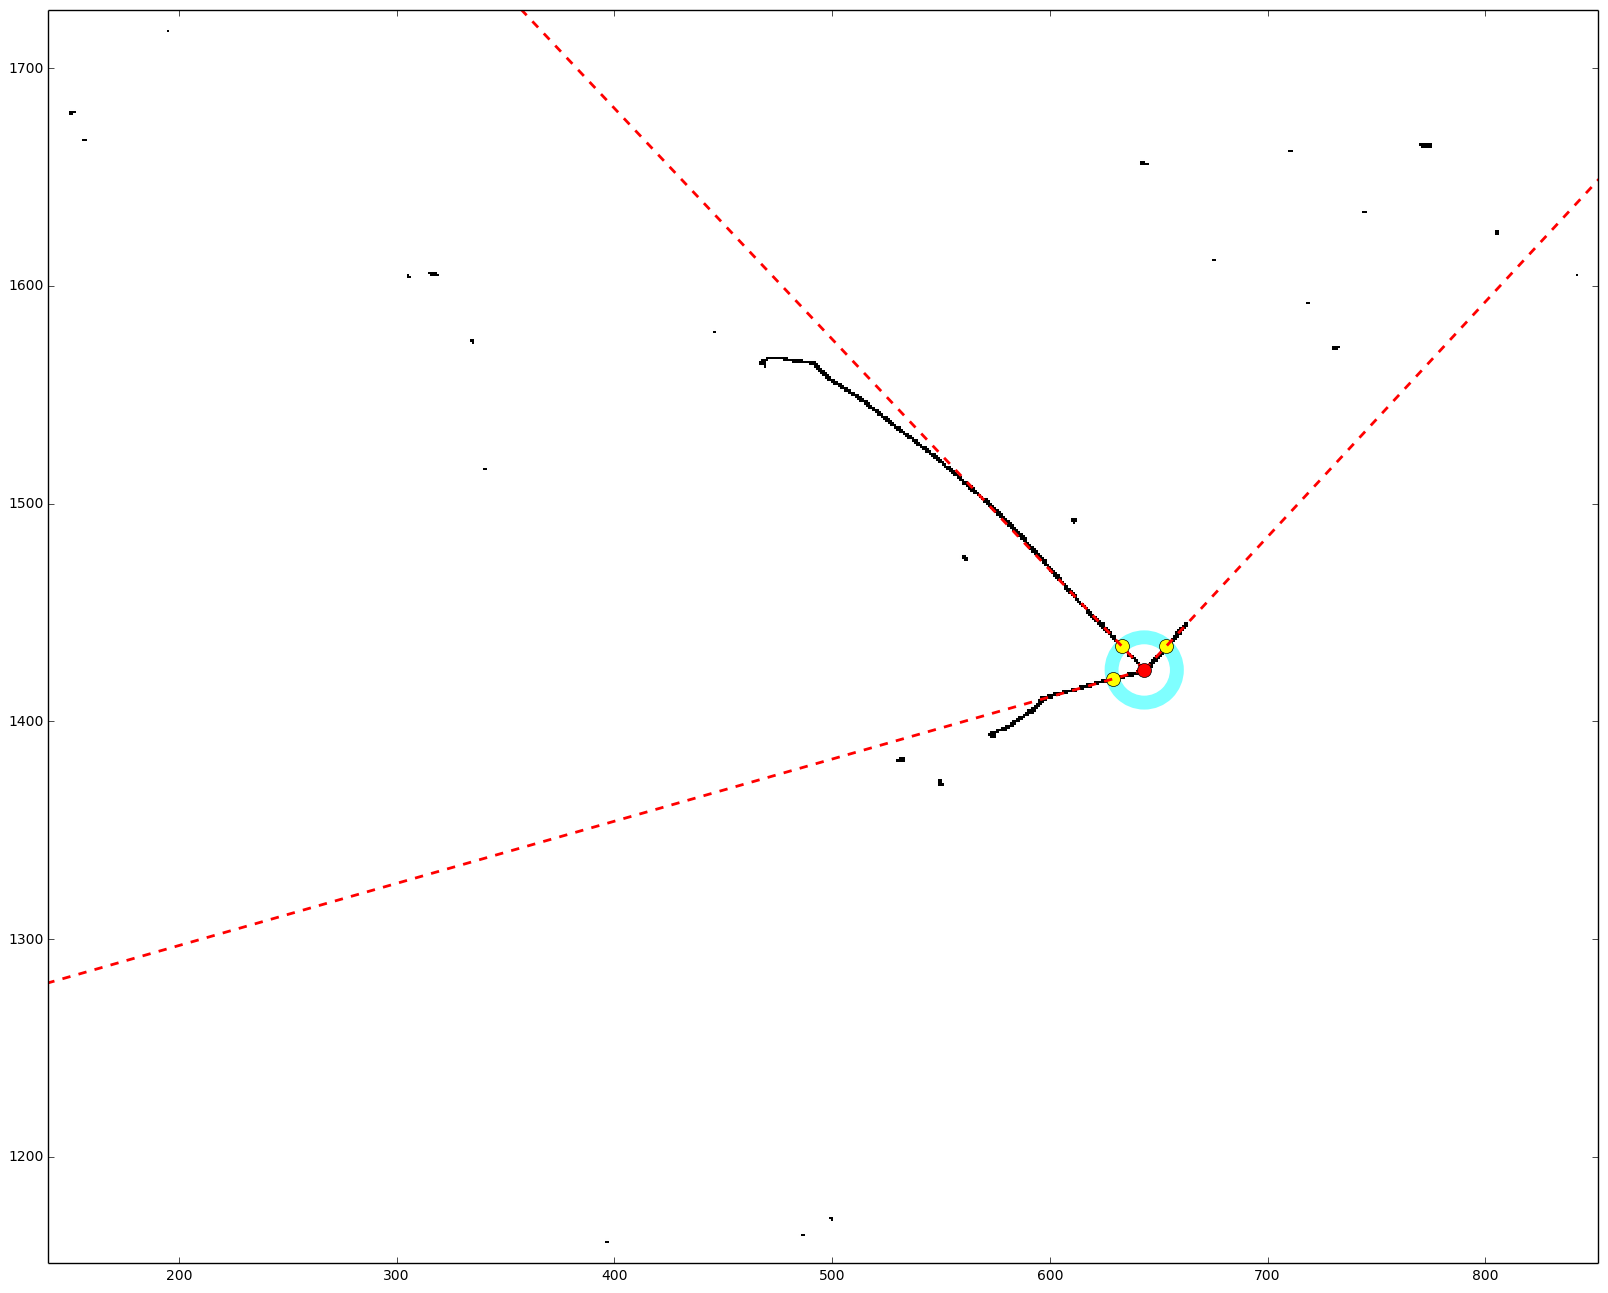

In [12]:
import cv2

# pick ones closest in time
radius=15.
cx_v=[]
cy_v=[]
for plane in xrange(3):
    print 'plane',plane
    vtx   = ref_data._cand_vtx_v[plane]
    score = ref_data._cand_score_v[plane]
    print vtx.x, vtx.y, score
    cx_v.append(vtx.x)
    cy_v.append(vtx.y)

#xranges=((600,700),(575,675),(100,200))
#yranges=((900,1000),(775,875),(875,975))
#xranges=((875,975),(575,675),(575,700))
#yranges=((600,700),(775,875),(1375,1475))

#cx,cy = (641.995788574,936.084777832)
#cx,cy = (648.477050781,940.827514648)
#cx,cy = (642.,935.)
for plane in xrange(3):

    #fig,ax = plt.subplots(figsize=(10,10))
    cx = cx_v[plane]
    cy = cy_v[plane]

    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    nz_pixels=np.where(shape_img>0.0)    
    pimg=cv2.linearPolar(shape_img,(cx,cy),radius*2,flags=cv2.WARP_FILL_OUTLIERS)
    col = 0.5 * pimg.shape[1]
    xv=[]
    yv=[]

    row_coll_v=[[]]
    combine_last = False

    for row in xrange(pimg.shape[0]):
        if pimg[row][col] < 1: 
            if len(row_coll_v[-1]): row_coll_v.append([])
            continue
        row_coll_v[-1].append(row)
    
    for idx in xrange(len(row_coll_v)):
        row_coll_v[idx] = np.array(row_coll_v[idx])

    # Check if the last element should be merged or not
    if len(row_coll_v) > 1:
        if row_coll_v[0][0] == 0 and row_coll_v[-1][-1] == pimg.shape[0]-1:
            row_coll_v[-1] -= (pimg.shape[0] - 1)
            row_coll_v[0] = np.concatenate((row_coll_v[0],row_coll_v[-1]),axis=0)
            row_coll_v.pop()
        for row_coll in row_coll_v:

            ar = np.array(row_coll)
            if len(row_coll) < 1: continue
            ave_row = ar.mean()
            if ave_row < 0:
                ave_row += (pimg.shape[0]-1)
            xv.append(cx + radius * np.cos(2 * 3.1415 * float(ave_row/pimg.shape[0])))
            yv.append(cy + radius * np.sin(2 * 3.1415 * float(ave_row/pimg.shape[0])))
            #plt.plot([col],[ave_row],marker='o',color='red',markersize=10)
    
    #plt.imshow(pimg,cmap='Greys',interpolation='none')
    #plt.show()

    fig,ax = plt.subplots(figsize=(20,20))
    

    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)   
    for idx in xrange(len(xv)):
        plt.plot([xv[idx]],[yv[idx]],marker='o',color='yellow', markersize=10)
        pt1 = Vector(DTYPE)(cx,cy)
        pt2 = Vector(DTYPE)(xv[idx],yv[idx])
        d = geo2d.dir(pt1,pt2)
        l = geo2d.HalfLine(DTYPE)(pt1,d)

        if d.x < 0:
            plt.plot([cx,0],[cy,l.y(0.)],marker='o',color='red',linestyle='--',linewidth=2)
        else:
            plt.plot([cx,shape_img.shape[1]],[cy,l.y(shape_img.shape[1])],marker='o',color='red',linestyle='--',linewidth=2)
    
    c=patches.Circle((cx,cy),radius,ec='cyan',fc='none',alpha=0.5,lw=10)
    ax.add_patch(c)

    plt.plot([cx],[cy],marker='o',color='red',markersize=10)
    
    nz_pixels=np.where(shape_img>0.0)
    #ax.set_ylim(yranges[plane][0],yranges[plane][1])
    #ax.set_xlim(xranges[plane][0],xranges[plane][1])
    #ax.set_xlim(600,700)
    #ax.set_ylim(800,900)
    ax.set_aspect(1/3.)
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    #xx,yy=get_vtx_pt(plane)
    #ax.plot(yy,xx,'*',markersize=10,color='yellow')
    plt.show()

Plane 0


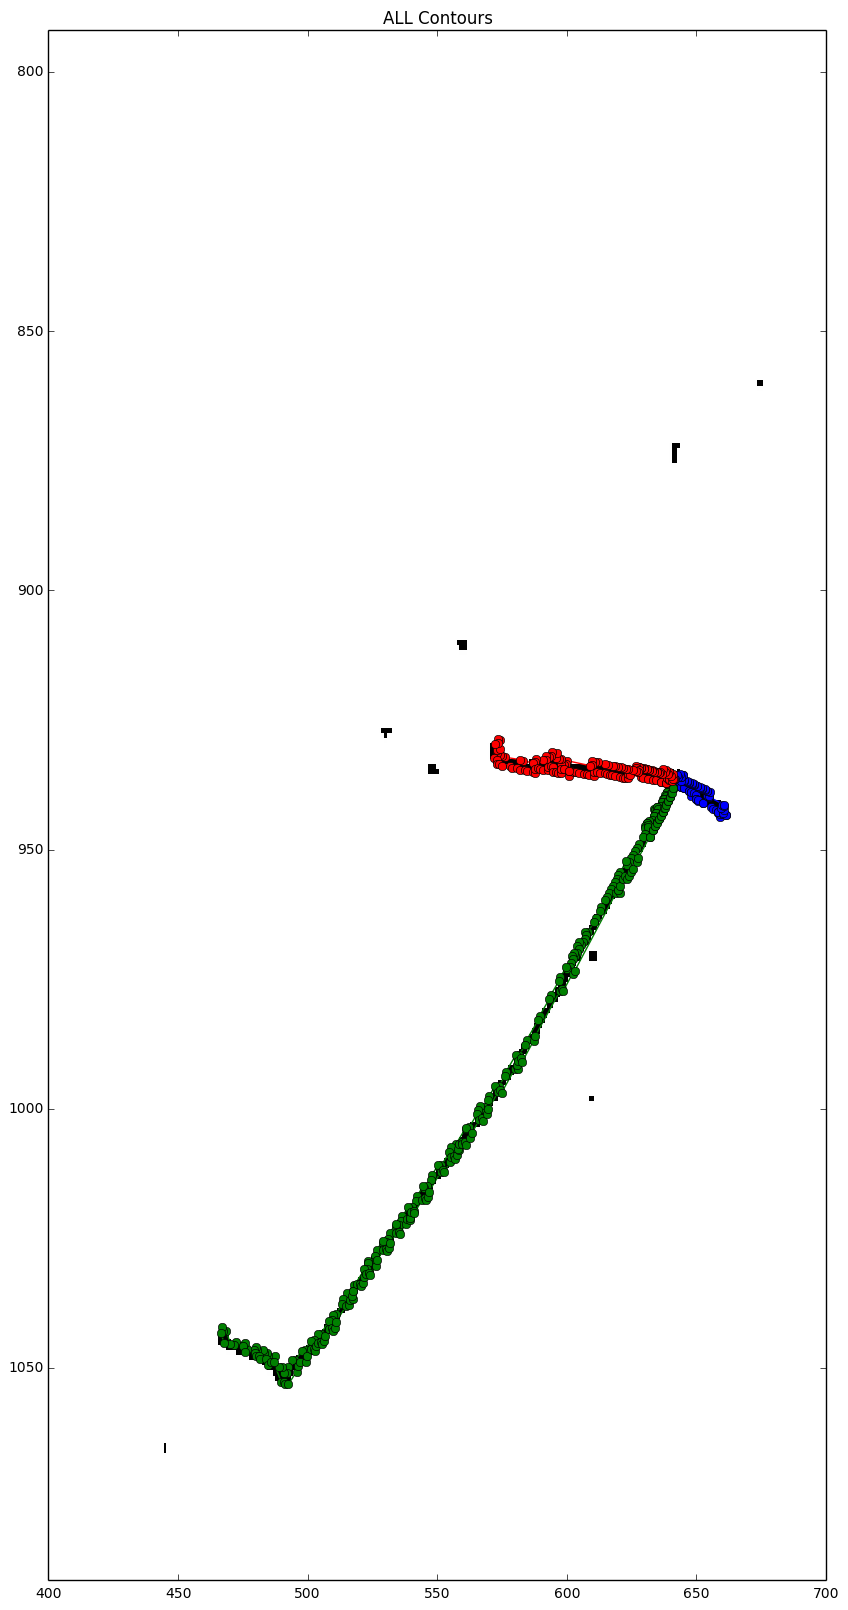

Plane 1


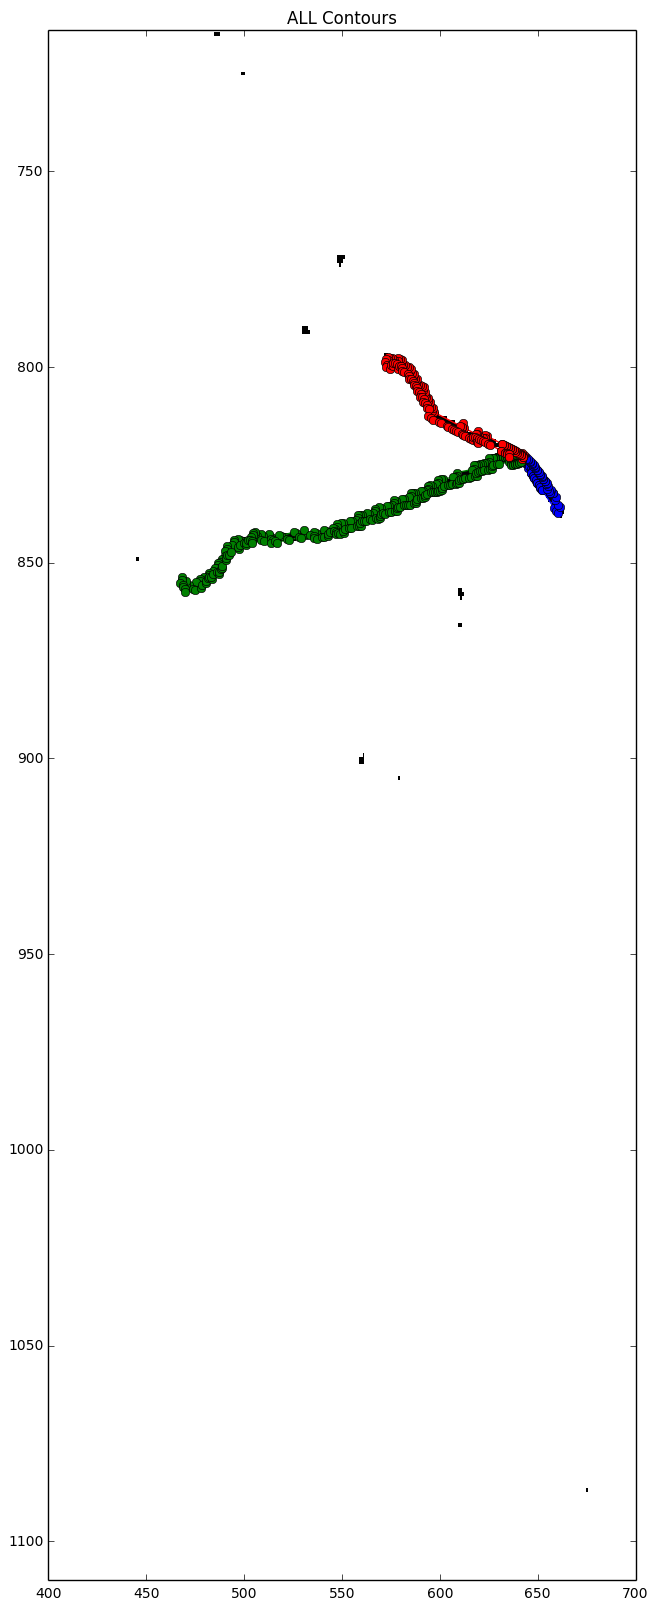

Plane 2


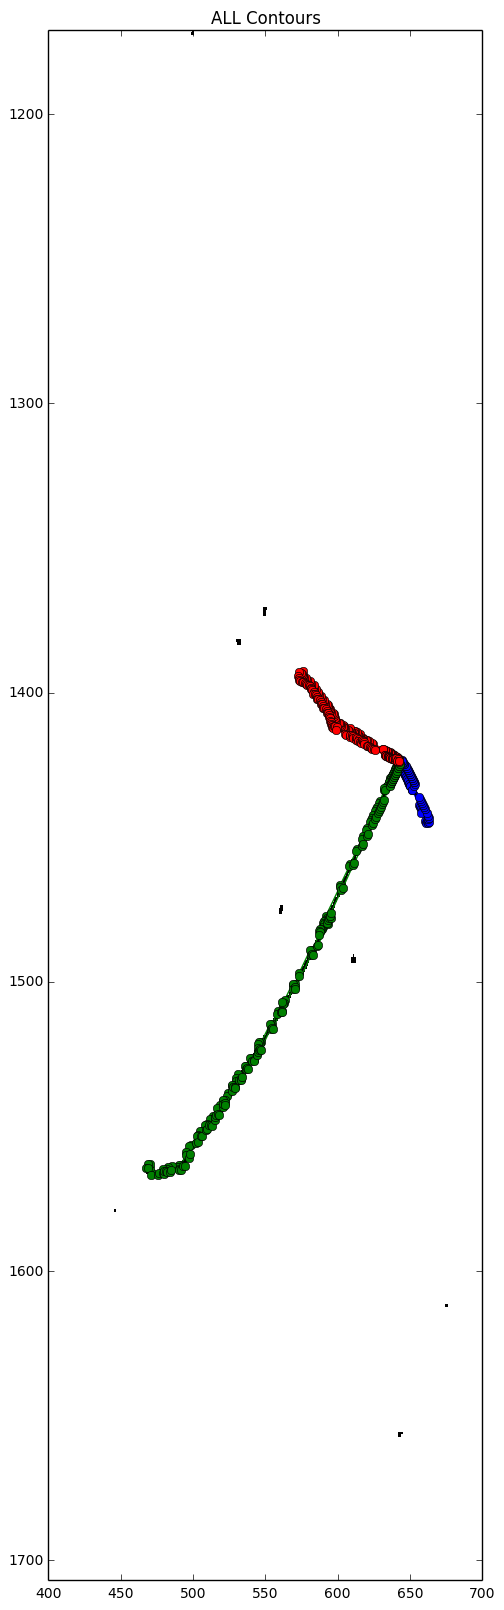

In [13]:
for plane in xrange(3):
    print 'Plane',plane
    fig,ax=plt.subplots(figsize=(20,20))

    #Get the image
    shape_img = img_v[plane]
    shape_img=np.where(shape_img>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.max(nz_pixels[0])-10,np.min(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(900,1100)
    ax.set_xlim(400,700)

    data=dm.Data(5)

    all_ctor=data._ctor_vv[plane]

    for ctor in all_ctor:
        pts=[]
        for idx in xrange(ctor.size()): pts.append([ctor[idx].x,ctor[idx].y])
        pts = np.array(pts)
        plt.plot(pts[:,0],pts[:,1],'-o')

    ax.set_aspect(2.0)
    ax.set_title("ALL Contours")
    plt.show()

In [ ]:
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(20,20))

    #Get the image
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(900,1100)
    #ax.set_xlim(400,700)

    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    data=dm.Data(6)

    split_lines=data._split_line_v_v[plane]

    for sline in split_lines:
        ax.plot([0,900],[sline.y(0),sline.y(900)])

    atomic_p0=data._atomic_ctor_v_v[plane]

    for atomic in atomic_p0:
        pts=np.array([[pt.x,pt.y] for pt in atomic])
        plt.plot(pts[:,0],pts[:,1],'-o')

    ax.set_aspect(2.0)
    ax.set_title("ALL Contours")
    plt.show()

Plane 0


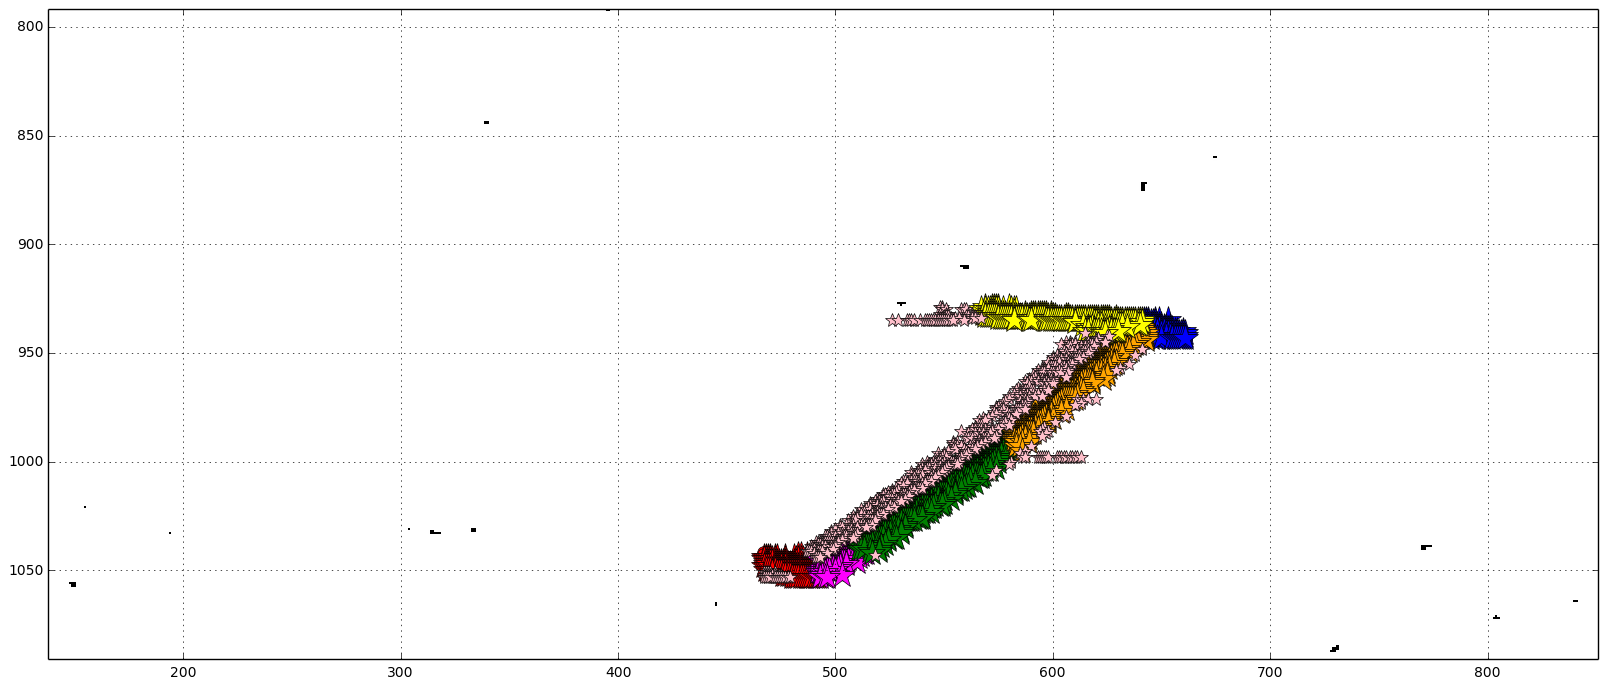

Plane 1


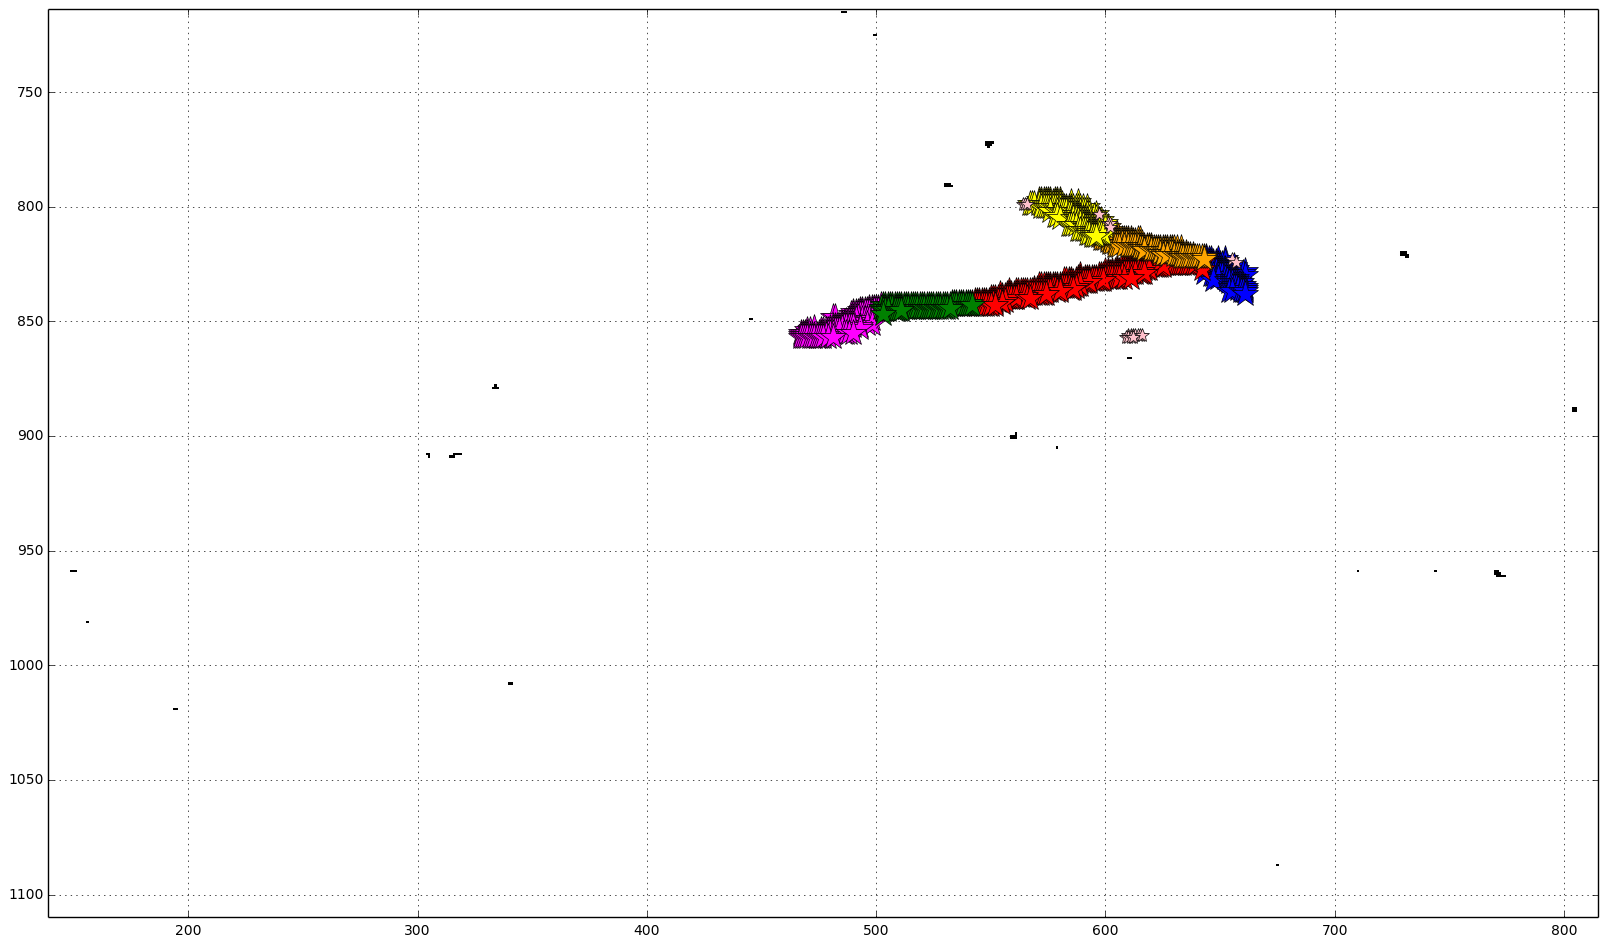

Plane 2


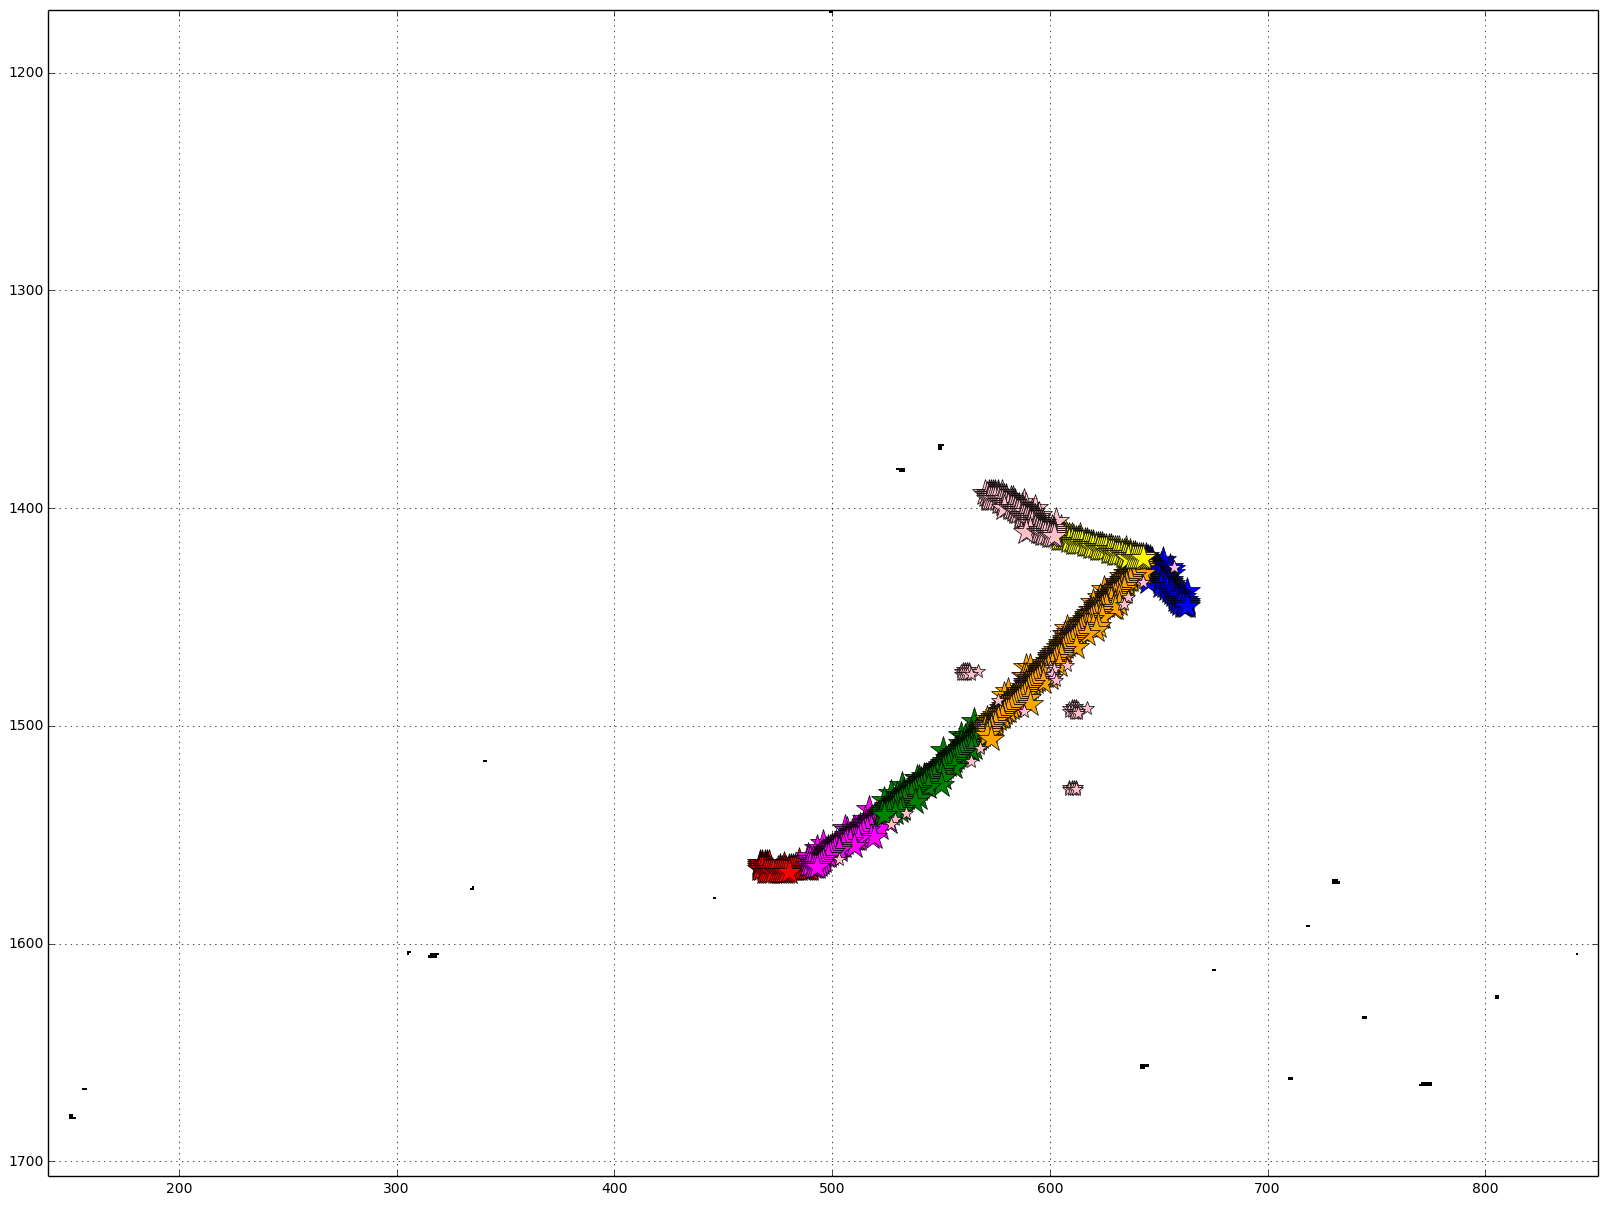

In [14]:
for plane in xrange(3):

    print 'Plane',plane
    fig,ax=plt.subplots(figsize=(20,20))

    #Get the image
    shape_img = img_v[plane]
    shape_img=np.where(shape_img>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.max(nz_pixels[0])-10,np.min(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    
    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    data=dm.Data(6)

    atomic_p0=data._atomic_ctor_v_v[plane]
    for ii,atomic in enumerate(atomic_p0):
        pts=np.array([[pt.x,pt.y] for pt in atomic])
        ax.plot(pts[:,0],pts[:,1],'o-',lw=2,color=colormap[ii%nc],markersize=10)
    
    data=dm.Data(9)
    pts2ctor=np.array(data._pt2cluster_vv[plane]).astype(np.int)
    pts=data._pts_vv[plane]
    pts=np.array([[pts[p].x,pts[p].y] for p in xrange(pts.size())])
    pts2ctor=np.where(pts2ctor>=0,pts2ctor,-1)
    
    for c_idx in xrange(np.max(pts2ctor)+1):
        inside=pts[ np.argwhere(pts2ctor==c_idx)[:,0] ]
        ax.plot(inside[:,0],inside[:,1],'*',color=colormap[c_idx%nc],markersize=20)
        
    inside=pts[ np.argwhere(pts2ctor==-1)[:,0] ]
    ax.plot(inside[:,0],inside[:,1],'*',color='pink',markersize=10)
    
    #ax.set_xlim(450,700)
    #ax.set_xlim(625-50,650+50)
    #ax.set_ylim(1600,1300)
    #ax.set_ylim(1450+50,1400-50)
    

    #ax.set_aspect(1/3.0)
    ax.grid()
    plt.show()

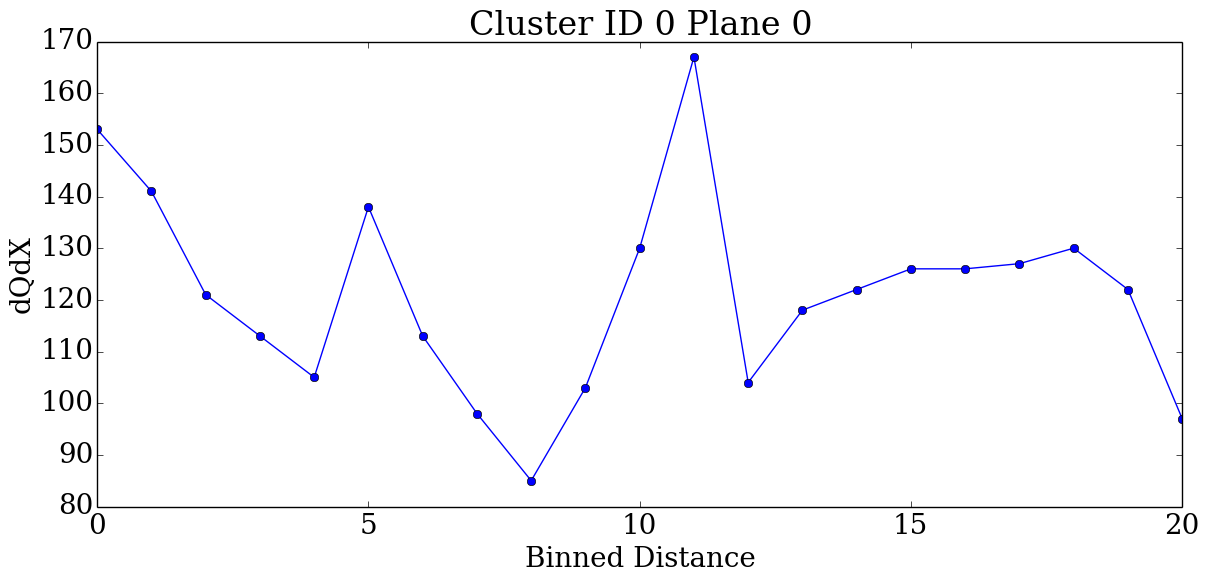

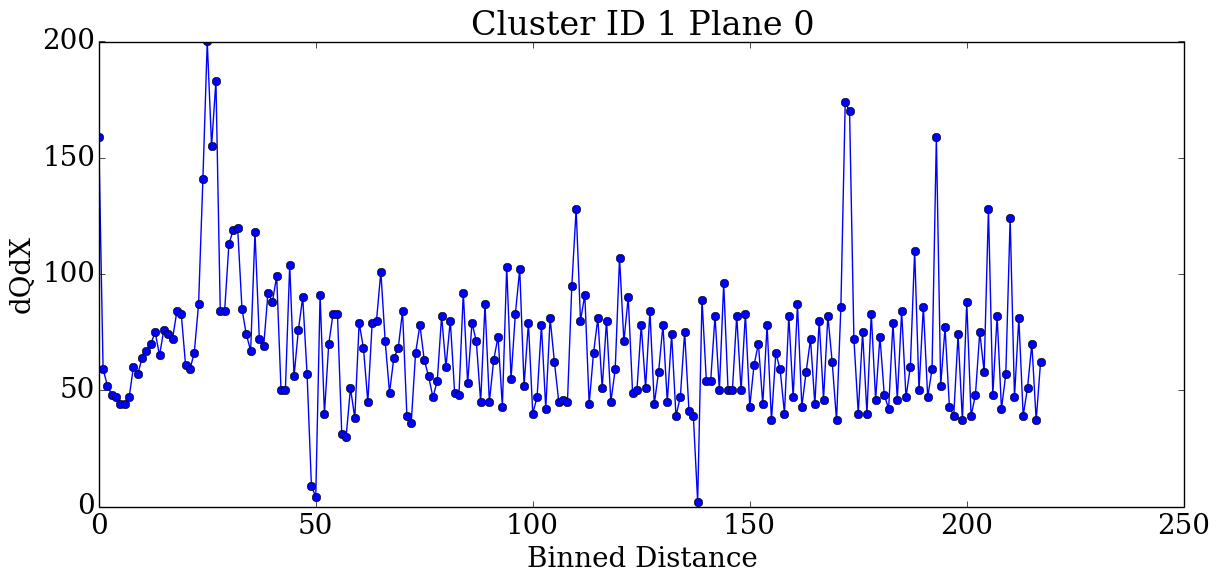

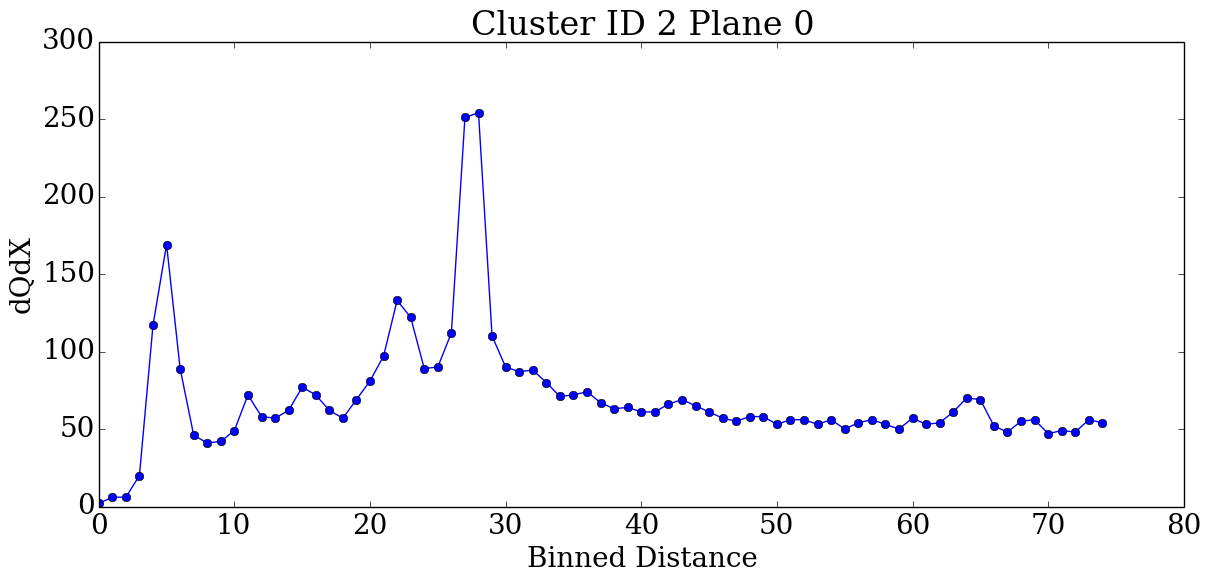

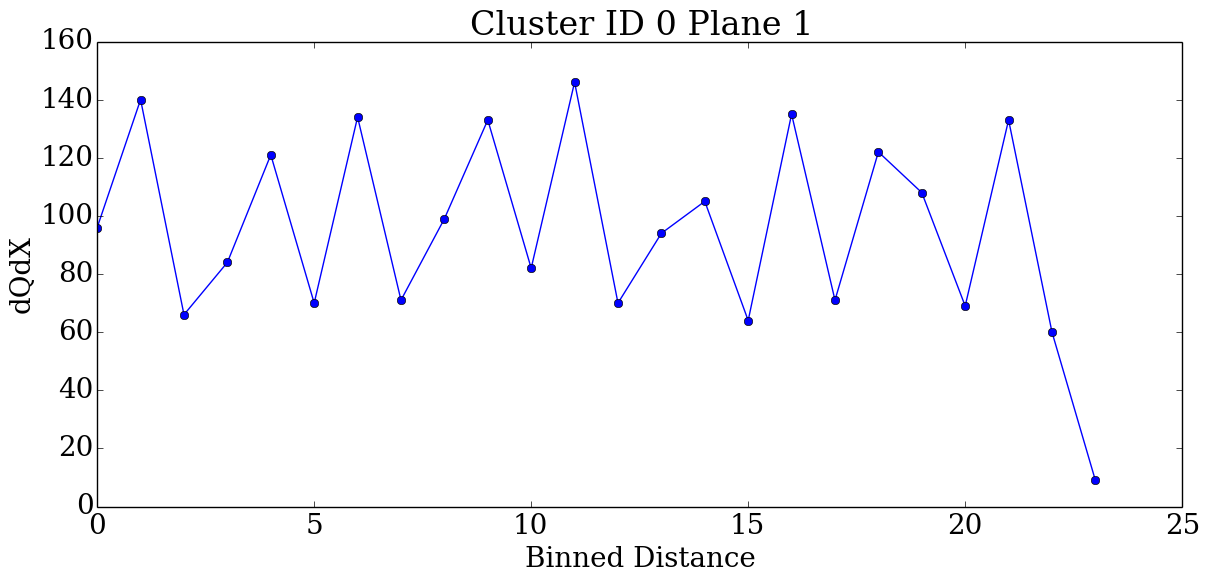

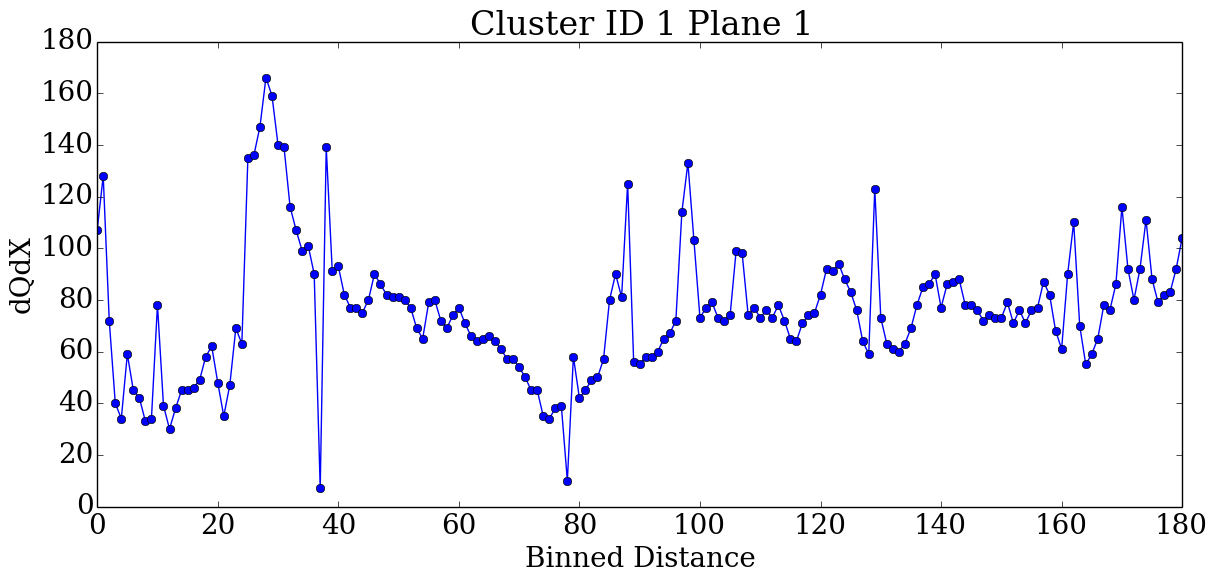

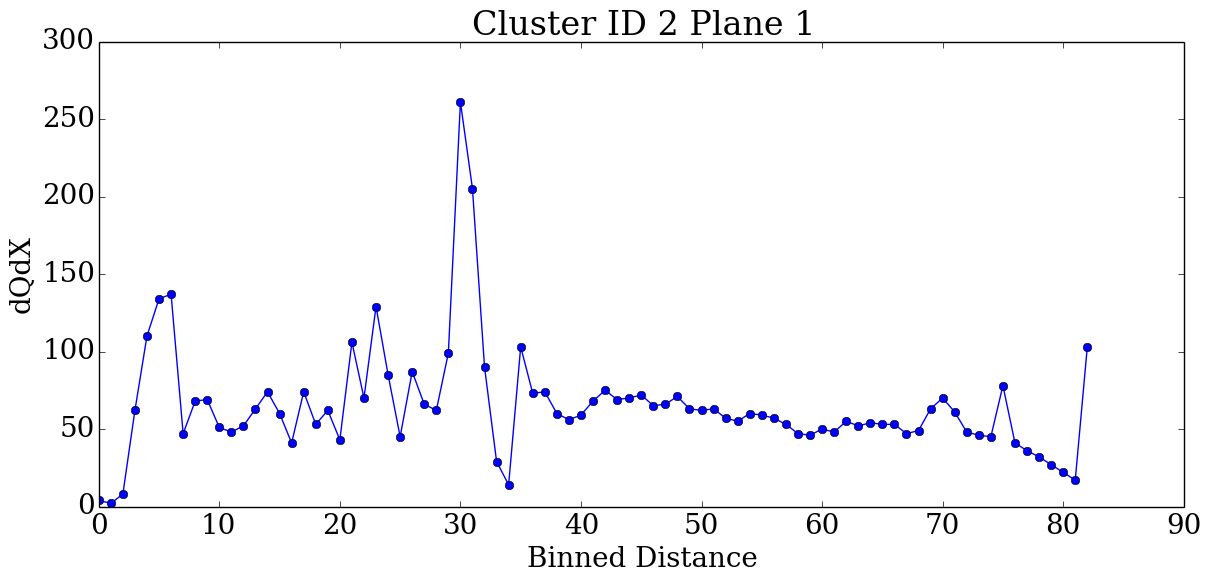

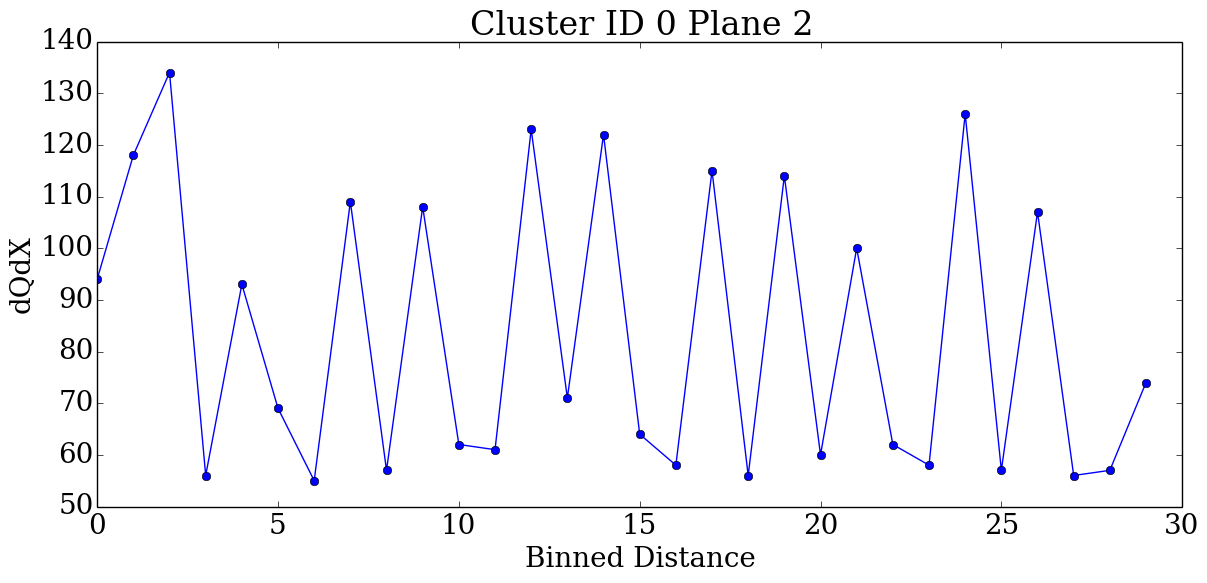

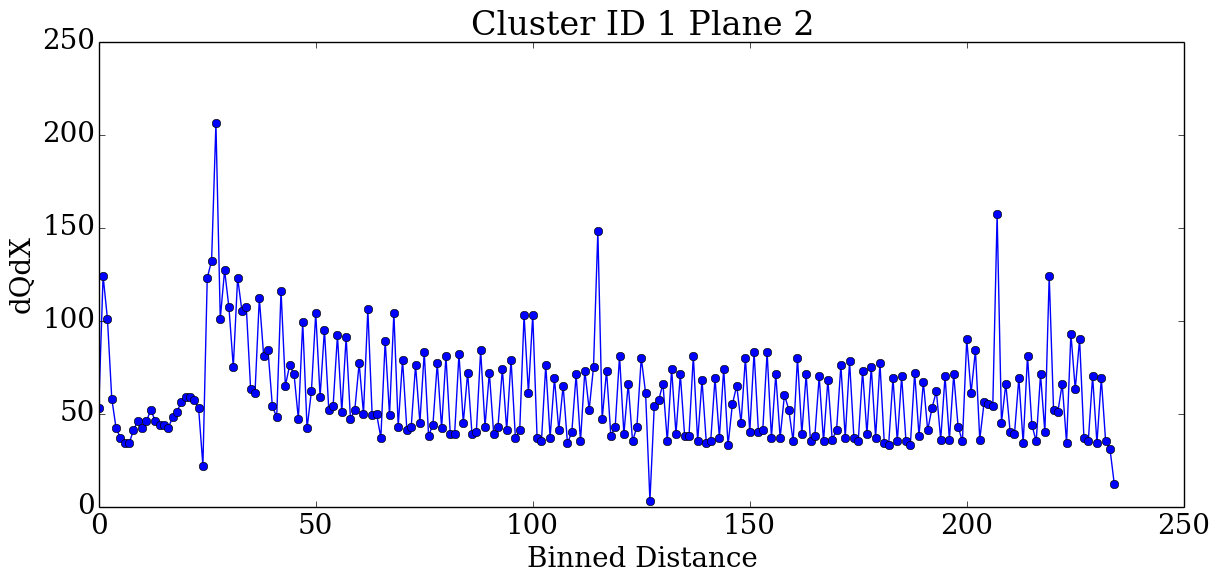

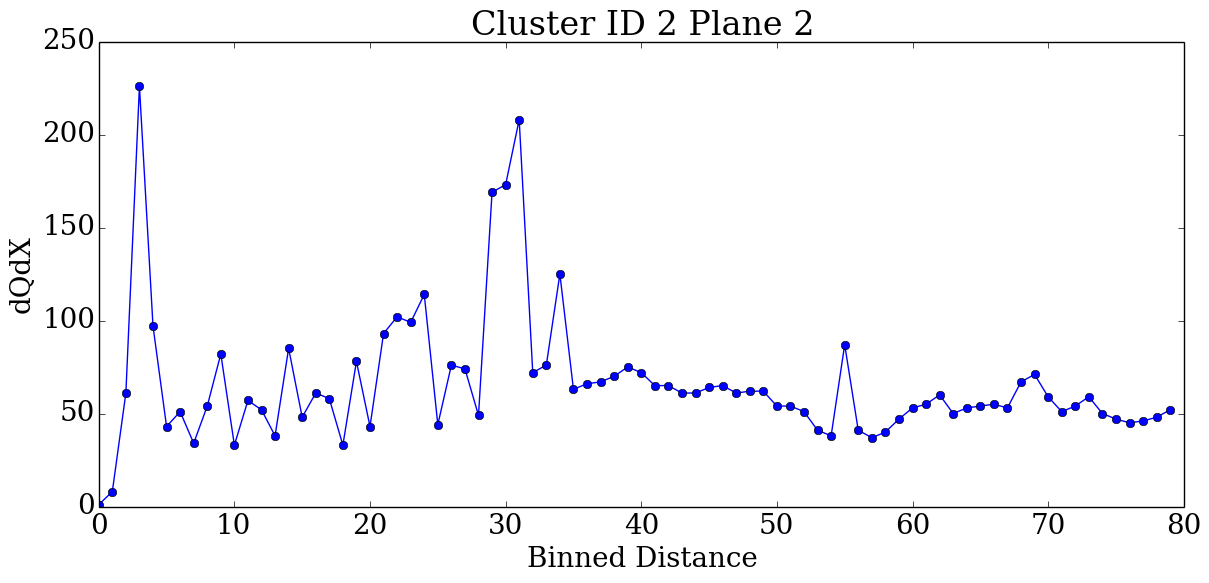

In [15]:
matplotlib.rcParams['font.size']=20
matplotlib.rcParams['font.family']='serif'

for plane in xrange(3):

    data=dm.Data(9)
    mindx=0
    
    for ix,dqdx_v in enumerate(data._o_dqdx_vvv[plane]):
        fig,ax=plt.subplots(figsize=(14,6))
        dqdxv=np.array(dqdx_v)
        ax.plot(np.arange(0,dqdxv.size,1),
                dqdxv,'-o')
        ax.set_title("Cluster ID {} Plane {}".format(ix,plane))
        ax.set_ylabel("dQdX")
        ax.set_xlabel("Binned Distance")
        plt.show()

plane 0
Number of track on this plane is  3
ctor size is  1
pixel size in ctor  0  is  75
ctor size is  4
pixel size in ctor  0  is  133
pixel size in ctor  1  is  129
pixel size in ctor  2  is  33
pixel size in ctor  3  is  35
ctor size is  1
pixel size in ctor  0  is  142
plane 1
Number of track on this plane is  3
ctor size is  1
pixel size in ctor  0  is  64
ctor size is  3
pixel size in ctor  0  is  173
pixel size in ctor  1  is  43
pixel size in ctor  2  is  65
ctor size is  2
pixel size in ctor  0  is  77
pixel size in ctor  1  is  77
plane 2
Number of track on this plane is  3
ctor size is  1
pixel size in ctor  0  is  75
ctor size is  4
pixel size in ctor  0  is  122
pixel size in ctor  1  is  59
pixel size in ctor  2  is  48
pixel size in ctor  3  is  23
ctor size is  2
pixel size in ctor  0  is  99
pixel size in ctor  1  is  89


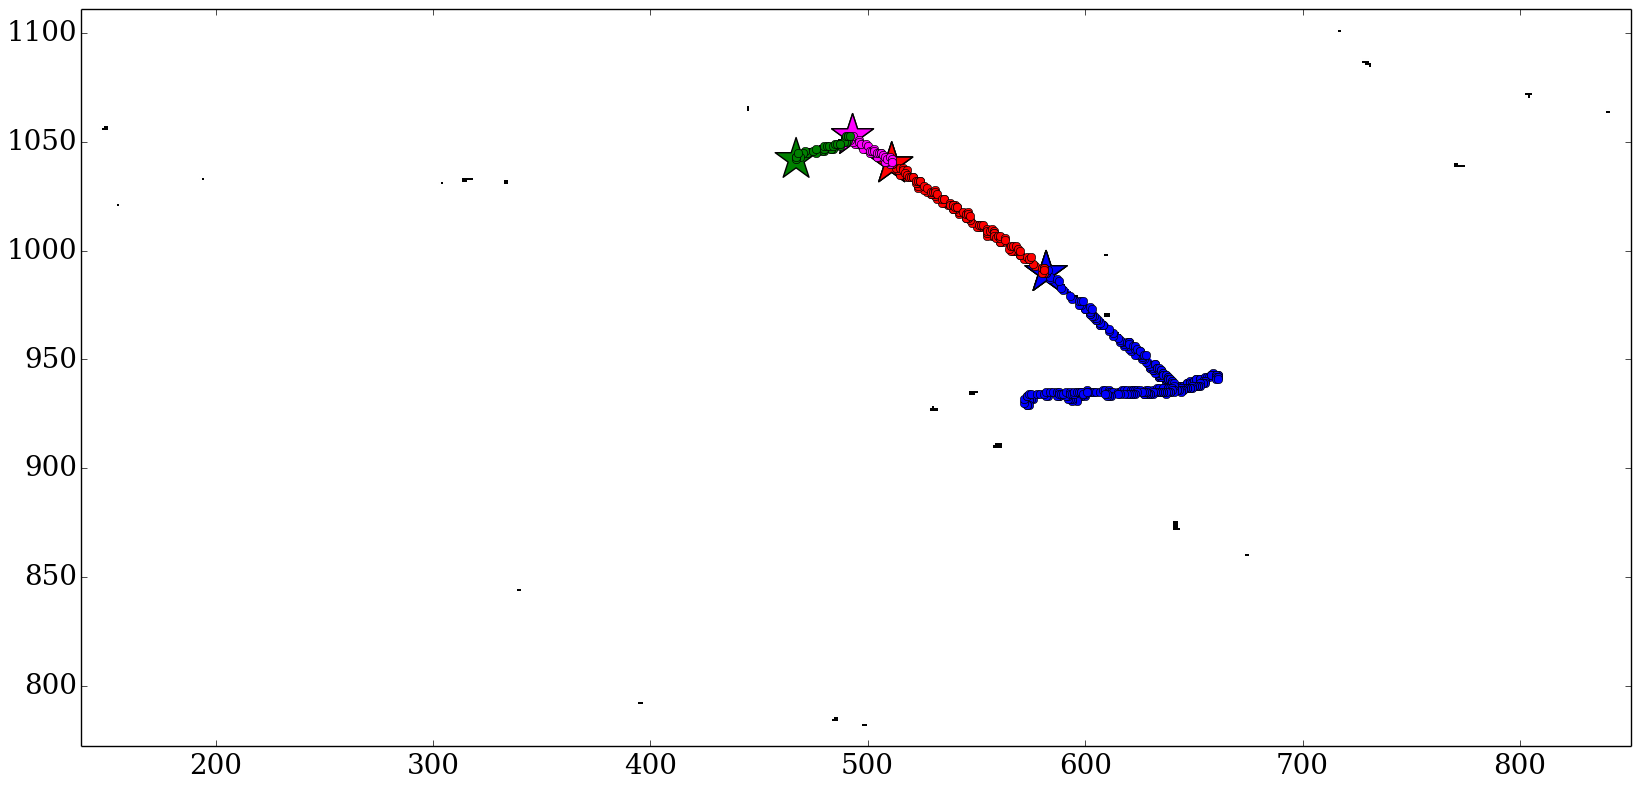

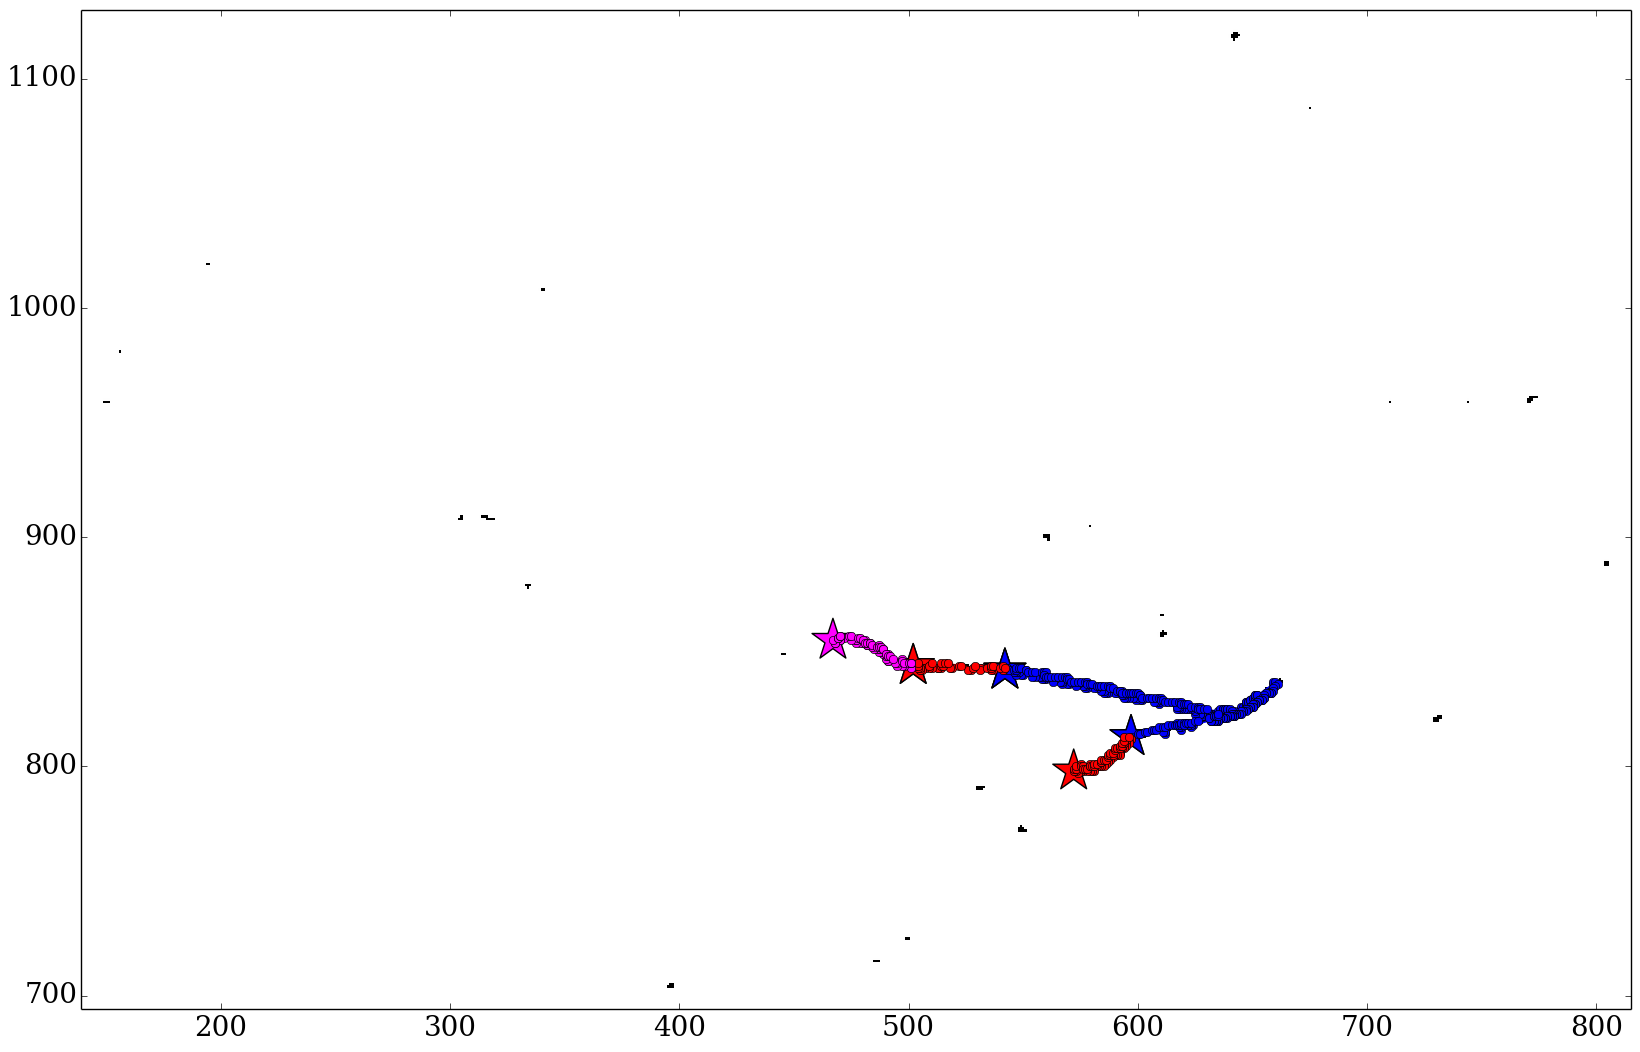

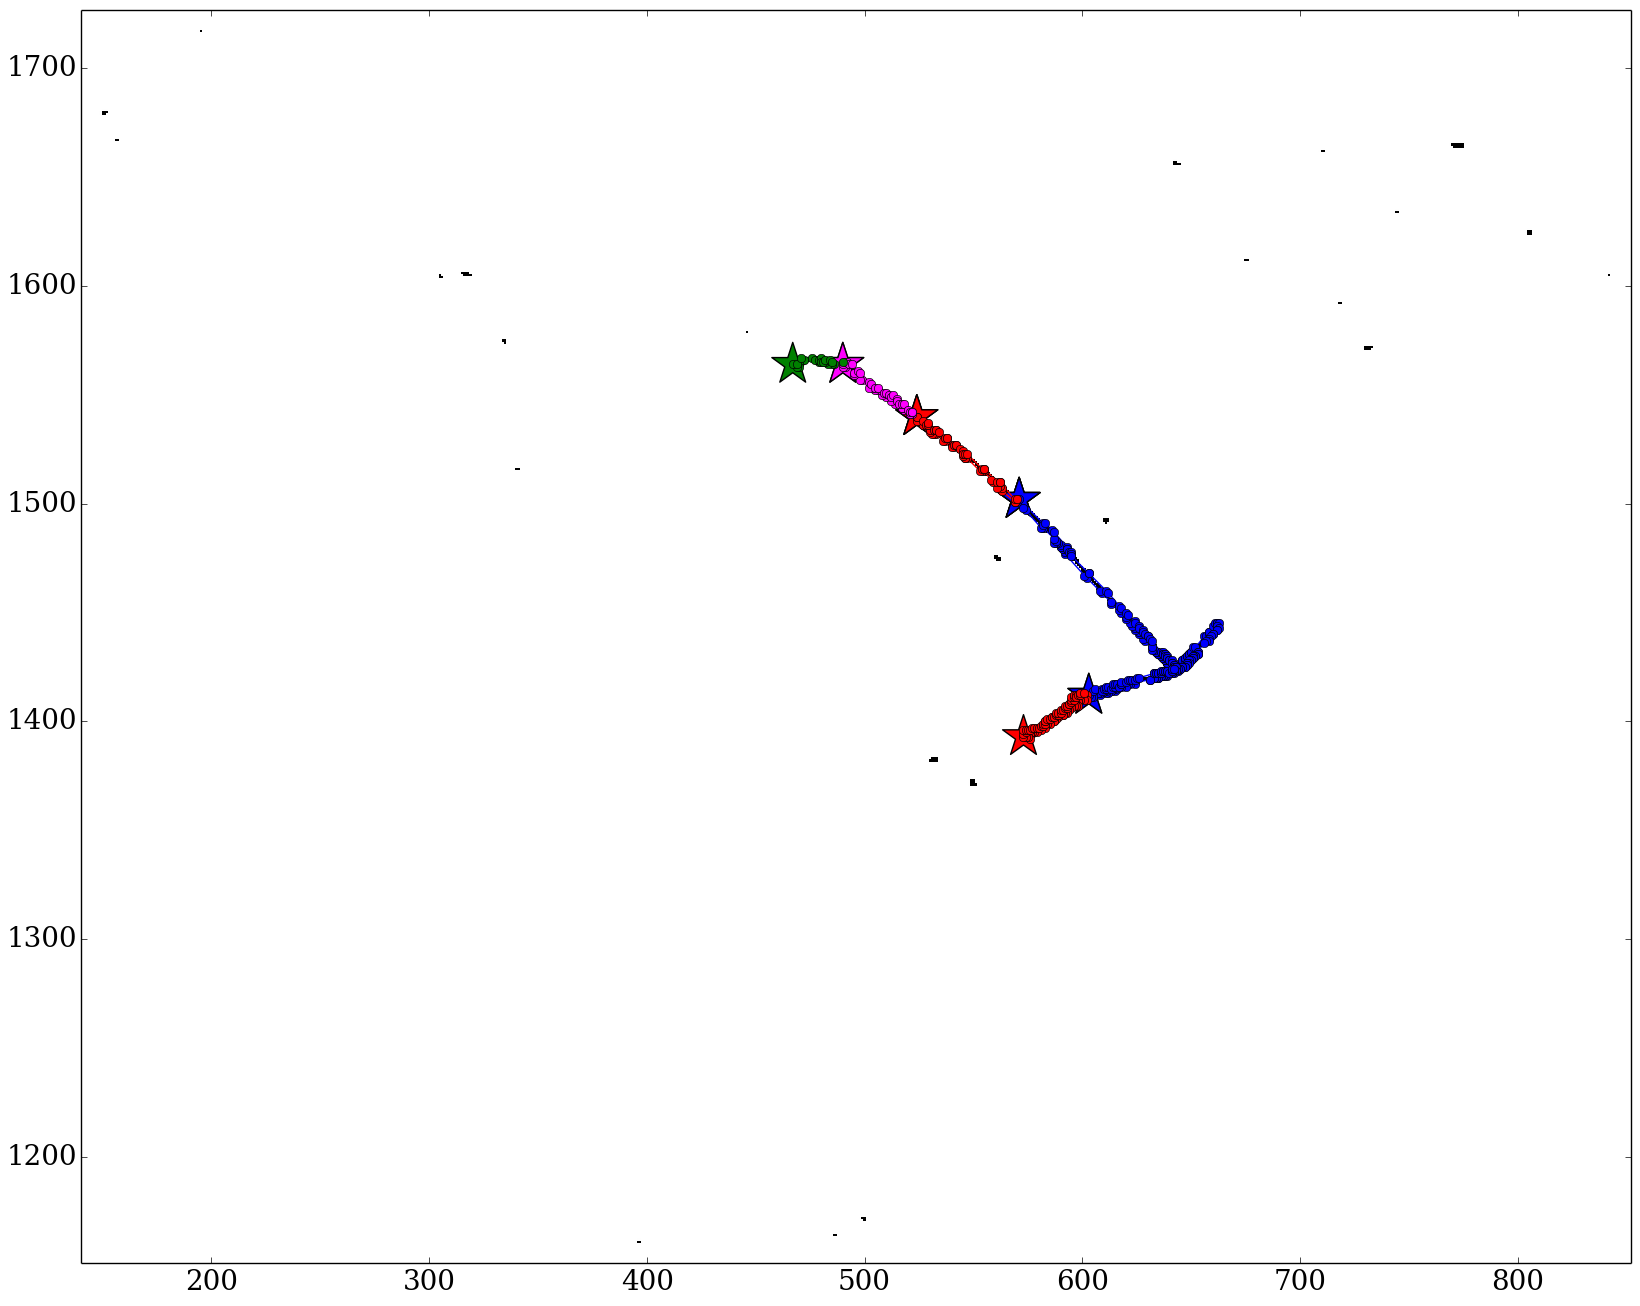

In [19]:
for plane in xrange(3):
    fig,ax=plt.subplots(figsize=(20,20))

    #Get the image
    shape_img=np.where(img_v[plane]>10.0,1.0,0.0).astype(np.uint8)
    #shape_img[:,::-1]=shape_img
    plt.imshow(shape_img,cmap='Greys',interpolation='none')
    nz_pixels=np.where(shape_img>0.0)
    ax.set_ylim(np.min(nz_pixels[0])-10,np.max(nz_pixels[0])+10)
    ax.set_xlim(np.min(nz_pixels[1])-10,np.max(nz_pixels[1])+10)
    #ax.set_ylim(900,1100)
    #ax.set_xlim(400,700)

    mgr=larbysimg.Manager()
    dm=mgr.DataManager()
    data=dm.Data(8)
    print "plane", plane
    #print data._atomic_order_ctor_v_v
    print "Number of track on this plane is ", data._atomic_order_ctor_v_v[plane].size()
    
    all_ctor=data._atomic_order_ctor_v_v[plane]
    all_kink=data._atomic_kink_v[plane]
    #for atomic in atomic_p0:
    #    pts=np.array([[pt.x,pt.y] for pt in atomic])
     #   plt.plot(pts[:,0],pts[:,1],'-o')
    for kink_atomic in all_kink:    
        kx=[]
        ky=[]
        for kink in  kink_atomic:
            kx.append(kink.x)
            ky.append(kink.y)
            plt.scatter(kx, ky, s=1000, c=colormap, marker = "*")

   
    for ctor_in_origin in all_ctor:
        #if ctor_in_origin.size()!=1: continue
        print "ctor size is ",ctor_in_origin.size()
        for idx in xrange(ctor_in_origin.size()): 
            print "pixel size in ctor ", idx, " is ",ctor_in_origin[idx].size()
            ptx = []
            pty = []
            for idy in xrange(ctor_in_origin[idx].size()):
                ptx.append(ctor_in_origin[idx][idy].x)
                pty.append(ctor_in_origin[idx][idy].y)                
            plt.plot(ptx, pty,'-o',color=colormap[idx])
            ptx=[]
            pty=[]
            #ax.set_xlim(450,550)
            #ax.set_ylim(1000,1100)
            #pts.append([ctor[idx][idy].x,ctor[idx][idy].y])
#        pts = np.array(pts)
 #       plt.plot(pts[:,0],pts[:,1],'-o')#,color=colormap[])
    

In [18]:
print colormap

['blue', 'red', 'magenta', 'green', 'orange', 'yellow', 'pink']
